<Axes: xlabel='date', ylabel='npp'>

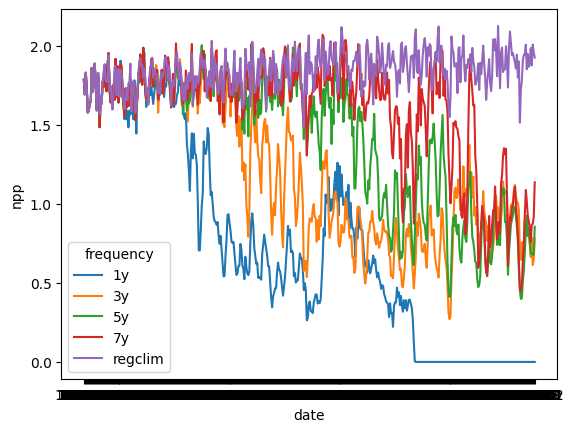

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_1y = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv") 
df_3y = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_3y_monthly.csv") 
df_5y = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_5y_monthly.csv") 
df_7y = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_7y_monthly.csv") 
df_regclim = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_regularclimate_monthly.csv")

df = pd.concat([df_1y, df_3y, df_5y, df_7y, df_regclim])

# Lista de frequências desejadas
frequencies = ["1y", "3y", "5y", "7y", "regclim"]

variables_to_plot = ['npp'] #, 'ls', 'evapm', 'total_carbon']  # , 'cleaf', 'croot', 'csap', 'cheart', 'csto']

# Criar subplots para cada variável
plt.figure(figsize=(18, 20))

# Número de subplots
num_subplots = len(variables_to_plot)

# Número de linhas e colunas
num_rows = 1 #4
num_cols = 1

# # Criar subplots para cada variável
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows), sharex=True)
# # Dicionário para mapear variáveis para títulos

# # Iterar sobre as variáveis
# for idx, variable in enumerate(variables_to_plot):
#     # Calcular a posição do subplot na matriz 4x1
#     row = idx

#     # Plotar cada frequência em um subplot separado
#     for freq_idx, freq in enumerate(set(df['frequency'])):
#         if freq == 0:
#             linestyle = '-'
#             label = 'Regular Climate'
#         else:
#             linestyle = '-'
#             label = f'{freq} years'

#         # Filtrar o DataFrame para a frequência atual
#         df_freq = df[df['frequency'] == freq]
        
#        # Adicionar mais uma dimensão ao acesso aos subplots
#         if variable == 'ls':
#             # Aumentar a linewidth para 'ls'
#             axes[row].plot(df_freq['date_dateformat'], df_freq[variable], linewidth=2, alpha=0.7, linestyle=linestyle, label=label)
#         else:
#             axes[row].plot(df_freq['date_dateformat'], df_freq[variable], linewidth=0.5, alpha=0.7, linestyle=linestyle, label=label)

#         axes[row].set_ylabel(f'{variable}', fontsize=16)
#         axes[row].tick_params(axis='both', which='both', labelsize=12)

# # Adicionar rótulos para o eixo x comum
# axes[-1].set_xlabel('Date', fontsize=20)

# # Adicionar legenda fora do subplot
# handles, labels = axes[-1].get_legend_handles_labels()
# fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.02), loc='upper center')


# # Ajustes na posição da legenda e espaçamento
# fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.02), loc='upper center')
# fig.subplots_adjust(bottom=0.15, top=0.9)

# # Salvar o gráfico como um arquivo PNG
# plt.savefig(os.path.join(path, f'{grd_acro}_timeseries_allfreq_{perc_prec}perc_subplots.png'), bbox_inches='tight')

# # Mostrar o gráfico
# plt.show()

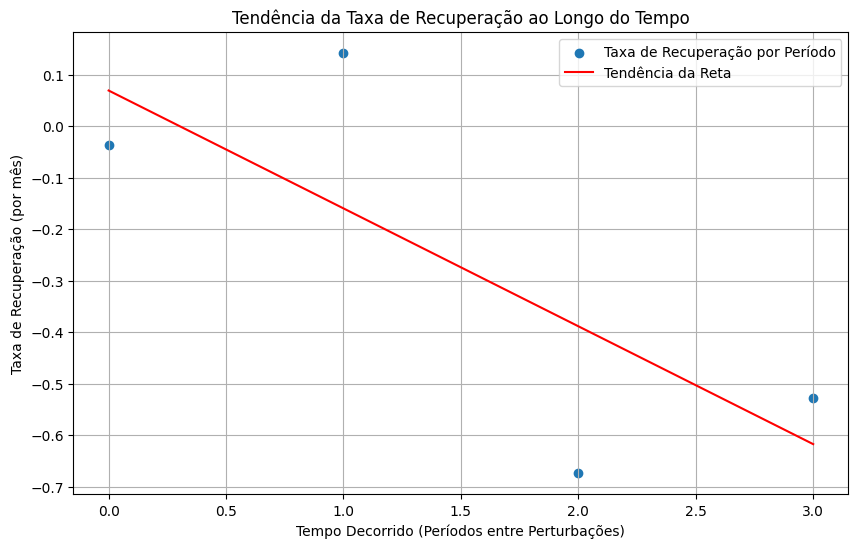

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerar dados de atenuação de luz hipotéticos ao longo do tempo
tempo = np.arange(0, 61)  # Dados para 5 anos (60 meses)
atenuacao_luz = np.random.uniform(0.2, 0.8, len(tempo))  # Atenuação de luz variável

# Identificar os momentos das perturbações (a cada 12 meses)
perturbacoes = np.arange(12, len(tempo), 12)

# Construir a linha de base para cada período entre as perturbações
quadratic_fits = []
for i in range(len(perturbacoes) - 1):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    quadratic_fit = np.poly1d(np.polyfit(tempo[inicio_periodo:fim_periodo], atenuacao_luz[inicio_periodo:fim_periodo], 2))
    quadratic_fits.append(quadratic_fit)

# Calcular a taxa de recuperação (coeficiente angular) para cada período entre as perturbações
recovery_rate_lambdas = []
for i, quadratic_fit in enumerate(quadratic_fits):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    X = np.arange(inicio_periodo, fim_periodo).reshape(-1, 1)
    y = -np.log(np.maximum(quadratic_fit(np.arange(inicio_periodo, fim_periodo)) - atenuacao_luz[inicio_periodo:fim_periodo], 1e-10))
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    recovery_rate_lambdas.append(linear_model.coef_[0])

# Calcular o tempo decorrido desde o início do experimento para cada período entre as perturbações
tempo_decorrido = np.arange(len(recovery_rate_lambdas))

# Ajustar uma reta entre as taxas de recuperação e o tempo decorrido desde o início do experimento
linear_model = LinearRegression()
linear_model.fit(tempo_decorrido.reshape(-1, 1), recovery_rate_lambdas)
tendencia_reta = linear_model.predict(tempo_decorrido.reshape(-1, 1))

# Plotar as taxas de recuperação e a tendência da reta
plt.figure(figsize=(10, 6))
plt.scatter(tempo_decorrido, recovery_rate_lambdas, label='Taxa de Recuperação por Período')
plt.plot(tempo_decorrido, tendencia_reta, color='red', label='Tendência da Reta')
plt.xlabel('Tempo Decorrido (Períodos entre Perturbações)')
plt.ylabel('Taxa de Recuperação (por mês)')
plt.title('Tendência da Taxa de Recuperação ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as s
from sklearn.linear_model import LinearRegression

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Ordenar o DataFrame por data
df_1y = df_1y.sort_values(by='date')

# Encontrar os índices de dezembro para o início e o fim da série temporal
start_index = df_1y[df_1y['date'].dt.month == 12].index[0]
end_index = df_1y[df_1y['date'].dt.month == 12].index[-1]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as s

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Ordenar o DataFrame por data
df_1y = df_1y.sort_values(by='date')


# Encontrar os índices de dezembro para o início e o fim da série temporal
start_index = df_1y[df_1y['date'].dt.month == 12].index[0]
end_index = df_1y[df_1y['date'].dt.month == 12].index[-1]

quadratic_fits = []
perturbacoes = []
# Iterar sobre a série temporal em intervalos de dois anos
for i in range(start_index, end_index, 24):  # 24 meses correspondem a dois anos
    # Subconjunto de dados a partir de dezembro de um ano até dezembro do próximo ano
    subset = df_1y.iloc[i:i + 24]  # 24 meses correspondem a dois anos
    quadratic_fit = np.poly1d(np.polyfit(np.arange(len(subset)), subset['npp'], 2))
    quadratic_fits.append(quadratic_fit)
    perturbacoes.append(i)


recovery_rate_lambdas = []

# Calcular a taxa de recuperação (coeficiente angular) para cada período entre as perturbações
for i in range(len(quadratic_fits) - 1):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    X = np.arange(inicio_periodo, fim_periodo).reshape(-1, 1)
    y = np.log(np.maximum(quadratic_fits[i](np.arange(inicio_periodo, fim_periodo)) - df_1y['npp'].iloc[inicio_periodo:fim_periodo], 1e-10))
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    recovery_rate_lambdas.append(linear_model.coef_[0])
# Ajustar uma reta que represente a tendência das taxas de recuperação ao longo de todo o tempo do experimento
X = np.arange(len(recovery_rate_lambdas)).reshape(-1, 1)
y = np.array(recovery_rate_lambdas).reshape(-1, 1)
linear_model_experimento = LinearRegression()
linear_model_experimento.fit(X, y)

# Plotar os dados e a reta ajustada
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Taxas de recuperação')
plt.plot(X, linear_model_experimento.predict(X), color='red', linewidth=2, label='Reta ajustada')
plt.xlabel('Período')
plt.ylabel('Taxa de recuperação')
plt.title('Tendência das taxas de recuperação ao longo do experimento')
plt.legend()
plt.grid(True)
plt.show()

# Encontrar o valor máximo da taxa de recuperação
max_recovery_rate = max(recovery_rate_lambdas)
print("Valor máximo da taxa de recuperação:", max_recovery_rate)




NameError: name 'LinearRegression' is not defined

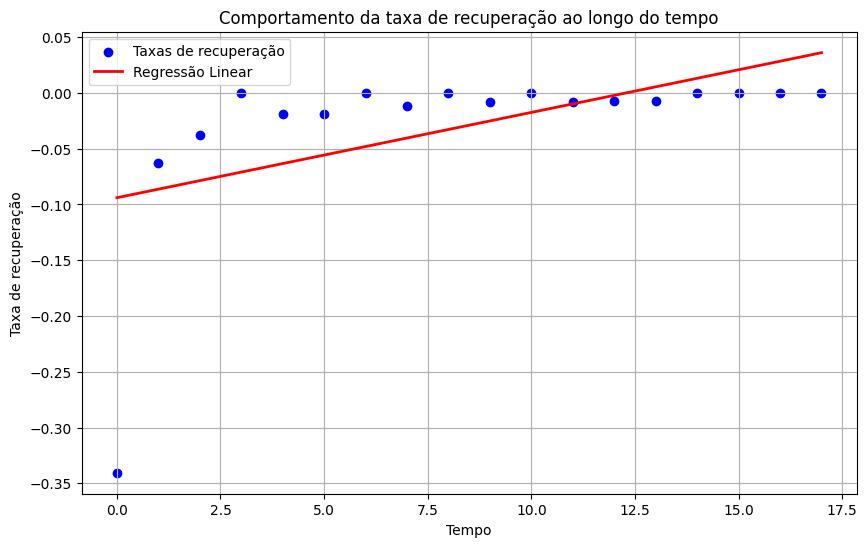

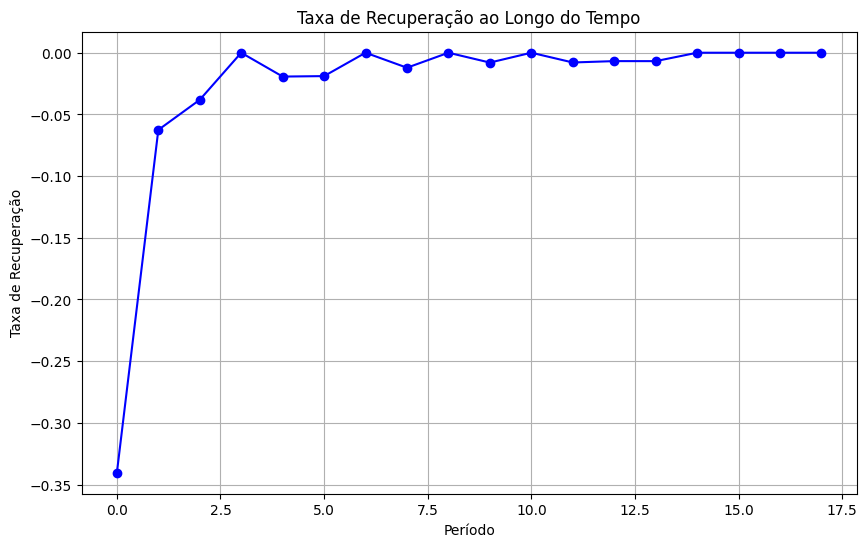

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Ordenar o DataFrame por data
df_1y = df_1y.sort_values(by='date')

# Encontrar os índices de dezembro para o início e o fim da série temporal
start_index = df_1y[df_1y['date'].dt.month == 12].index[0]
end_index = df_1y[df_1y['date'].dt.month == 12].index[-1]

quadratic_fits = []
perturbacoes = []

# Iterar sobre a série temporal em intervalos de dois anos
for i in range(start_index, end_index, 24):  # 24 meses correspondem a dois anos
    # Subconjunto de dados a partir de dezembro de um ano até dezembro do próximo ano
    subset = df_1y.iloc[i:i + 24]  # 24 meses correspondem a dois anos
    quadratic_fit = np.poly1d(np.polyfit(np.arange(len(subset)), subset['npp'], 2))
    quadratic_fits.append(quadratic_fit)
    perturbacoes.append(i)

recovery_rate_lambdas = []

# Calcular a taxa de recuperação (coeficiente angular) para cada período entre as perturbações
for i in range(len(quadratic_fits) - 1):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    X = np.arange(inicio_periodo, fim_periodo).reshape(-1, 1)
    y = -np.log(np.maximum(quadratic_fits[i](np.arange(inicio_periodo, fim_periodo)) - df_1y['npp'].iloc[inicio_periodo:fim_periodo], 1e-10))
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    recovery_rate_lambdas.append(linear_model.coef_[0])

# Ajustar uma regressão linear à taxa de recuperação ao longo do tempo
X = np.arange(len(recovery_rate_lambdas)).reshape(-1, 1)
y = np.array(recovery_rate_lambdas).reshape(-1, 1)
linear_model_tempo = LinearRegression()
linear_model_tempo.fit(X, y)

# Plotar os dados e a regressão linear
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Taxas de recuperação')
plt.plot(X, linear_model_tempo.predict(X), color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Tempo')
plt.ylabel('Taxa de recuperação')
plt.title('Comportamento da taxa de recuperação ao longo do tempo')
plt.legend()
plt.grid(True)
plt.show()

# Criar os índices para os períodos
periodos = np.arange(len(recovery_rate_lambdas))

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.plot(periodos, recovery_rate_lambdas, marker='o', linestyle='-', color='blue')
plt.xlabel('Período')
plt.ylabel('Taxa de Recuperação')
plt.title('Taxa de Recuperação ao Longo do Tempo')
plt.grid(True)
plt.show()


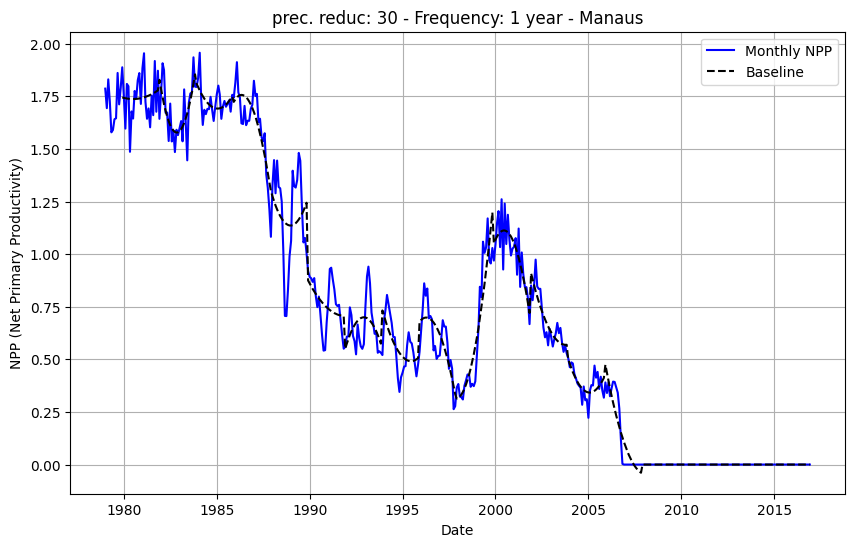

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


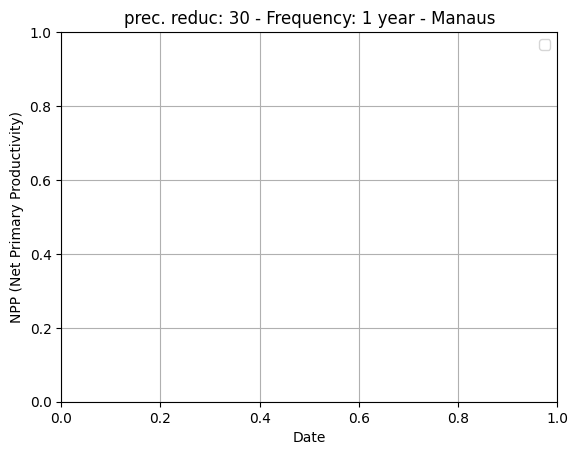

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])


# Inicializar listas para armazenar os resultados do ajuste
dates_fit = []
npp_fit_values = []

# Iterar sobre os períodos de dois anos
for year in range(1979, 2016, 2):
    # Encontrar os índices de dezembro para o início e o fim do período de dois anos
    start_date = pd.Timestamp(year, 12, 1)
    end_date = pd.Timestamp(year + 2, 12, 1)
    subset = df_1y[(df_1y['date'] >= start_date) & (df_1y['date'] < end_date)]

    # Ajustar uma curva quadrática ao subconjunto
    coefficients = np.polyfit(np.arange(len(subset)), subset['npp'], 2)
    quadratic_fit = np.poly1d(coefficients)

    # Adicionar pontos ajustados à lista
    dates_fit.extend(subset['date'])
    npp_fit_values.extend(quadratic_fit(np.arange(len(subset))))

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df_1y['date'], df_1y['npp'], label='Monthly NPP', color='blue')
plt.plot(dates_fit, npp_fit_values, label='Baseline', linestyle='--', color='black')
plt.xlabel('Date')
plt.ylabel('NPP (Net Primary Productivity)')
plt.title('prec. reduc: 30 - Frequency: 1 year - Manaus')
plt.legend()
plt.grid(True)
plt.show()

# Adicionar flechas vermelhas nos anos de distúrbio
disturbance_years = [year for year in range(1980, 2017, 2)]
for year in disturbance_years:
    disturbance_date = pd.Timestamp(year, 12, 1)
    plt.annotate('Disturbance', xy=(disturbance_date, df_1y.loc[df_1y['date'] == disturbance_date, 'npp'].values[0]),
                 xytext=(disturbance_date, df_1y['npp'].min()),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.xlabel('Date')
plt.ylabel('NPP (Net Primary Productivity)')
plt.title('prec. reduc: 30 - Frequency: 1 year - Manaus')
plt.legend()
plt.grid(True)
plt.show()

MOVING WINDOW OF 30 DAYS

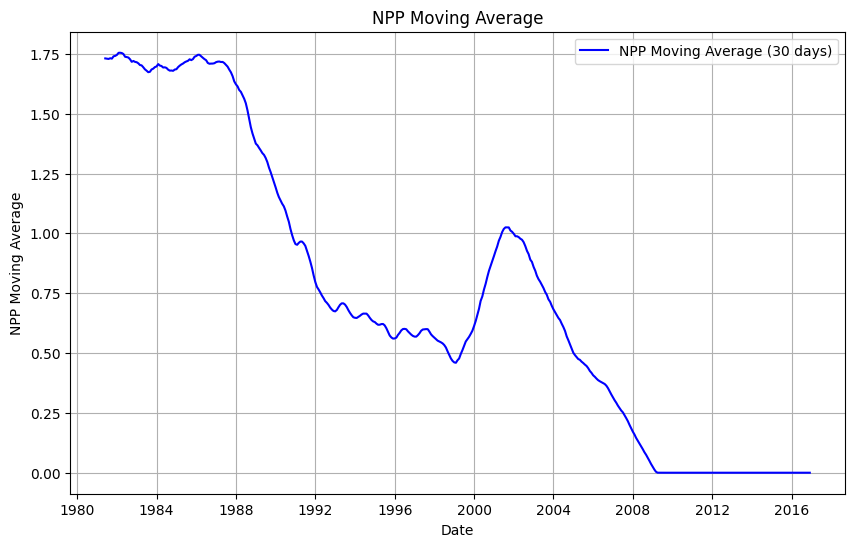

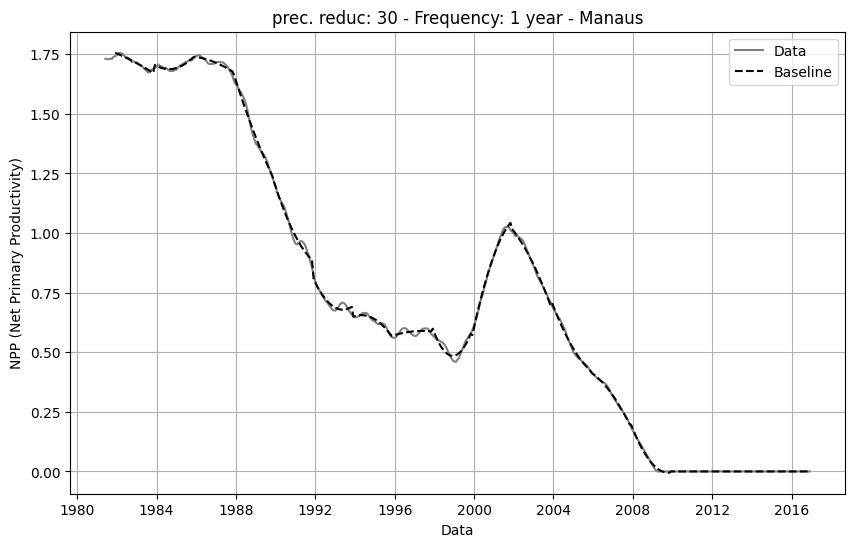

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Calculando a média móvel para a coluna 'npp' (por exemplo, usando uma janela de 30 dias)
window_size = 30
df_1y['npp_moving_avg'] = df_1y['npp'].rolling(window=window_size).mean()

# Plotando a média móvel
plt.figure(figsize=(10, 6))
plt.plot(df_1y['date'], df_1y['npp_moving_avg'], label=f'NPP Moving Average ({window_size} days)', color='blue')
plt.xlabel('Date')
plt.ylabel('NPP Moving Average')
plt.title('NPP Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# Inicializar listas para armazenar os resultados do ajuste
dates_fit = []
npp_fit_values = []

# Encontrar os índices de dezembro para o início e o fim da série temporal
start_index = df_1y[df_1y['date'].dt.month == 12].index[0]
end_index = df_1y[df_1y['date'].dt.month == 12].index[-1]

# Iterar sobre a série temporal em intervalos de dois anos
for i in range(start_index, end_index, 24):  # 24 meses correspondem a dois anos
    # Subconjunto de dados a partir de dezembro de um ano até dezembro do próximo ano
    subset = df_1y.iloc[i:i + 24]  # 24 meses correspondem a dois anos
    
    # Ajustar uma curva quadrática ao subconjunto
    coefficients = np.polyfit(np.arange(len(subset)), subset['npp_moving_avg'], 2)
    quadratic_fit = np.poly1d(coefficients)
    
    # Adicionar pontos ajustados à lista
    dates_fit.extend(subset['date'])
    npp_fit_values.extend(quadratic_fit(np.arange(len(subset))))

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df_1y['date'], df_1y['npp_moving_avg'], label='Data', color = 'grey')
plt.plot(dates_fit, npp_fit_values, label='Baseline', linestyle='--', color='black')
plt.xlabel('Data')
plt.ylabel('NPP (Net Primary Productivity)')
plt.title('prec. reduc: 30 - Frequency: 1 year - Manaus')
plt.legend()
plt.grid(True)
plt.show()

RECOVERY RATE FROM A MOVING BASE LINE


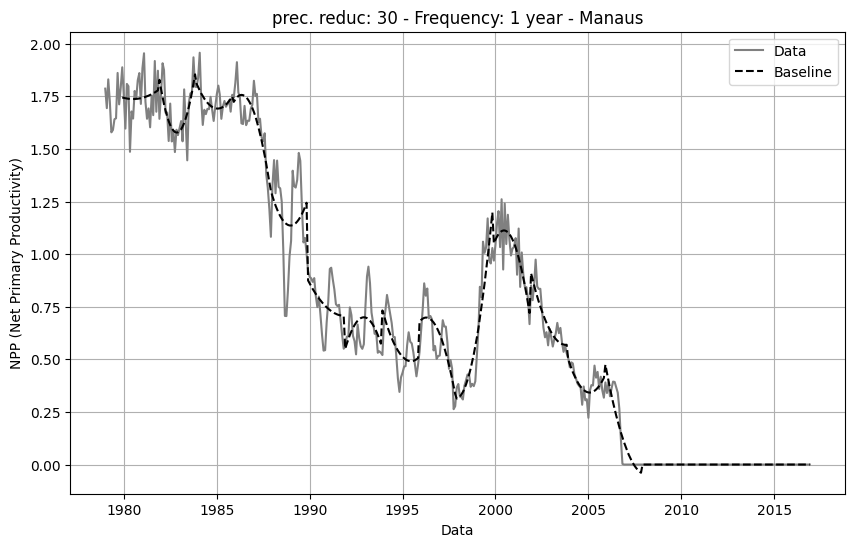

Taxas de Recuperação: [-0.1337063615718619, 0.0004254628148059325, 0.02992921606886456, -0.042482780740866644, 0.09088346695678075, -0.00016718826636163975, -0.07932927559416382, -0.010344295169795958, -0.04453943259772564, 0.024906866941511896, 0.05859371478920794, -0.030402119051476606, 0.009821173344929934, 0.0912268562131866, -0.0586862185716881, -0.05147239686053573, 0.01882961235075087, 0.023509410190939883, -0.027061487791761207, -0.024969127594137386, 0.07137898782264929, -0.003714620614544417, -0.027892002511764713, -0.0028829887651540265, -0.16125668754559297, -0.0126117826604224, 0.0690272106047316, -0.07506519085444663, -0.07167942612931577, 0.04212342848400963, 0.04175886726739142, -0.015762818214682395, -0.05099993608737152, 0.016381296813715363, 0.006480963205735768, -0.041196219961886826, 0.0007300260313178875, 0.013035941201647194, 0.02762114273724081, 0.060253238406061005, -0.028554453929187207, 0.03192041948900337, 0.003519049939203045, -0.09573765883131458, -0.00932

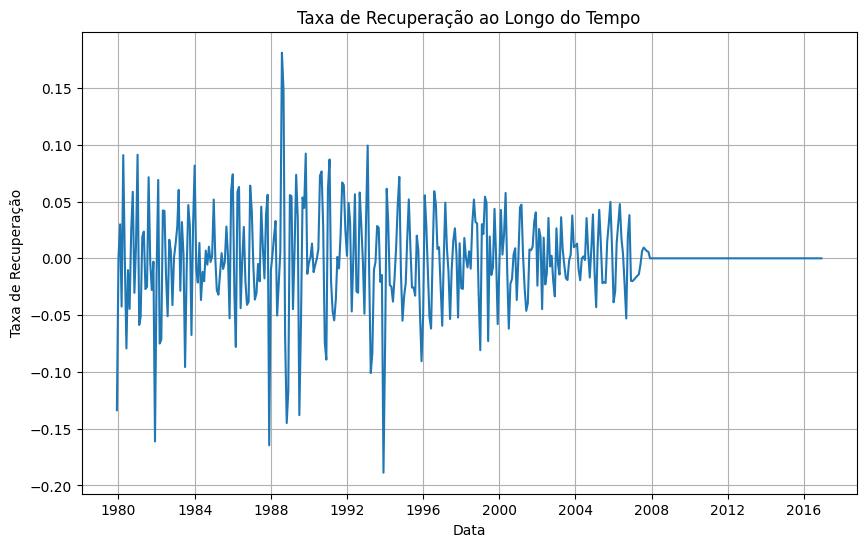

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as s

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Ordenar o DataFrame por data
df_1y = df_1y.sort_values(by='date')

# Inicializar listas para armazenar os resultados do ajuste
dates_fit = []
npp_fit_values = []
recovery_rates = []

# Encontrar os índices de dezembro para o início e o fim da série temporal
start_index = df_1y[df_1y['date'].dt.month == 12].index[0]
end_index = df_1y[df_1y['date'].dt.month == 12].index[-1]

# Iterar sobre a série temporal em intervalos de dois anos
for i in range(start_index, end_index, 24):  # 24 meses correspondem a dois anos
    # Subconjunto de dados a partir de dezembro de um ano até dezembro do próximo ano
    subset = df_1y.iloc[i:i + 24]  # 24 meses correspondem a dois anos
    
    # Ajustar uma curva quadrática ao subconjunto
    coefficients = np.polyfit(np.arange(len(subset)), subset['npp'], 2)
    quadratic_fit = np.poly1d(coefficients)
    
    # Calcular a diferença entre os valores de NPP observados e a linha de base
    npp_observed = subset['npp']
    npp_baseline = quadratic_fit(np.arange(len(subset)))
    epsilon = 1e-9  # ou qualquer outro valor pequeno
    npp_difference = np.abs(npp_observed - npp_baseline) + epsilon
    
    # Calcular a derivada dessa diferença em relação ao tempo (taxa de mudança da diferença de NPP)
    delta_time = 1 # Assumindo que o intervalo de tempo é de 1 mês
    recovery_rate = np.gradient(npp_difference, delta_time)
    
    # Adicionar pontos ajustados e taxas de recuperação à lista
    dates_fit.extend(subset['date'])
    npp_fit_values.extend(quadratic_fit(np.arange(len(subset))))
    recovery_rates.extend(recovery_rate)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df_1y['date'], df_1y['npp'], label='Data', color='grey')
plt.plot(dates_fit, npp_fit_values, label='Baseline', linestyle='--', color='black')
plt.xlabel('Data')
plt.ylabel('NPP (Net Primary Productivity)')
plt.title('prec. reduc: 30 - Frequency: 1 year - Manaus')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir as taxas de recuperação
print("Taxas de Recuperação:", recovery_rates)

# Adicionar o gráfico de linha das taxas de recuperação
plt.figure(figsize=(10, 6))
plt.plot(df_1y['date'].iloc[start_index:start_index + len(recovery_rates)], recovery_rates, linestyle='-')
plt.xlabel('Data')
plt.ylabel('Taxa de Recuperação')
plt.title('Taxa de Recuperação ao Longo do Tempo')
plt.grid(True)


In [53]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Ordenar o DataFrame por data
df_1y = df_1y.sort_values(by='date')

# Inicializar listas para armazenar os resultados do ajuste
dates_fit = []
npp_fit_values = []
recovery_rates = []

# Encontrar os índices de dezembro para o início e o fim da série temporal
start_index = df_1y[df_1y['date'].dt.month == 12].index[0]
end_index = df_1y[df_1y['date'].dt.month == 12].index[-1]

# Iterar sobre a série temporal em intervalos de dois anos
for i in range(start_index, end_index, 24):  # 24 meses correspondem a dois anos
    # Subconjunto de dados a partir de dezembro de um ano até dezembro do próximo ano
    subset = df_1y.iloc[i:i + 24]  # 24 meses correspondem a dois anos
    
    # Ajustar uma curva quadrática ao subconjunto
    coefficients = np.polyfit(np.arange(len(subset)), subset['npp'], 2)
    quadratic_fit = np.poly1d(coefficients)

    # Calcular a linha de base ajustada
    baseline_values = quadratic_fit(np.arange(len(subset)))
    
    # Adicionar pontos ajustados à lista
    dates_fit.extend(subset['date'])
    npp_fit_values.extend(baseline_values)

    
    # Calcular a diferença entre os valores de NPP observados e a linha de base
    npp_difference = np.abs(subset['npp'] - baseline_values) + epil
    # print(npp_difference)

    # Calcular a derivada dessa diferença em relação ao tempo (taxa de mudança da diferença de NPP)
    delta_time = 1  # Assumindo que o intervalo de tempo é de 1 mês
    npp_change_rate = np.gradient(npp_difference, delta_time)

    # Ajustar uma regressão linear à função -ln(ε0-εc) versus tempo
    ln_npp_difference = -np.log(npp_difference)
    slope, intercept = np.polyfit(np.arange(len(subset)), ln_npp_difference, 1)
    recovery_rate_lambda = -slope
    
    # Adicionar a taxa de recuperação à lista
    recovery_rates.append(recovery_rate_lambda)


NameError: name 'npp_observed' is not defined

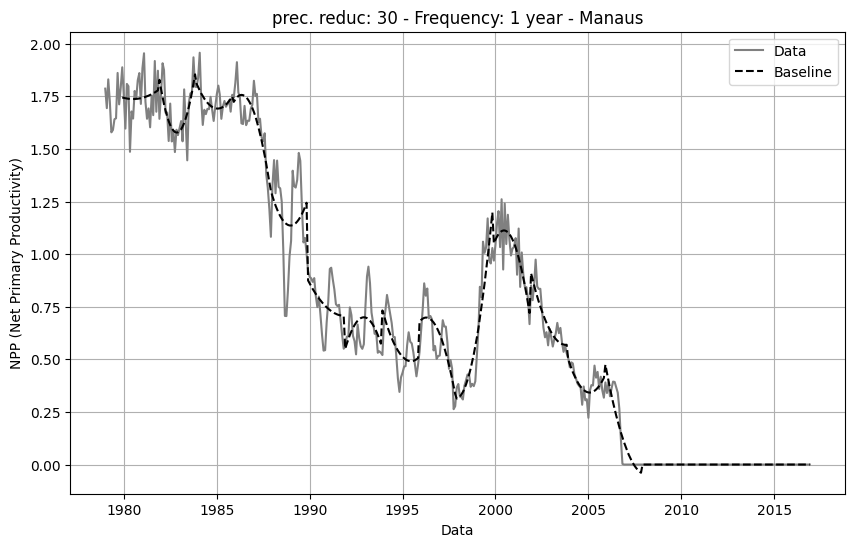

In [49]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Ordenar o DataFrame por data
df_1y = df_1y.sort_values(by='date')

# Inicializar listas para armazenar os resultados do ajuste
dates_fit = []
npp_fit_values = []

# Encontrar os índices de dezembro para o início e o fim da série temporal
start_index = df_1y[df_1y['date'].dt.month == 12].index[0]
end_index = df_1y[df_1y['date'].dt.month == 12].index[-1]

# Iterar sobre a série temporal em intervalos de dois anos
for i in range(start_index, end_index, 24):  # 24 meses correspondem a dois anos
    # Subconjunto de dados a partir de dezembro de um ano até dezembro do próximo ano
    subset = df_1y.iloc[i:i + 24]  # 24 meses correspondem a dois anos
    
    # Ajustar uma curva quadrática ao subconjunto
    coefficients = np.polyfit(np.arange(len(subset)), subset['npp'], 2)
    quadratic_fit = np.poly1d(coefficients)
    
    # Adicionar pontos ajustados à lista
    dates_fit.extend(subset['date'])
    npp_fit_values.extend(quadratic_fit(np.arange(len(subset))))

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df_1y['date'], df_1y['npp'], label='Data', color = 'grey')
plt.plot(dates_fit, npp_fit_values, label='Baseline', linestyle='--', color='black')
plt.xlabel('Data')
plt.ylabel('NPP (Net Primary Productivity)')
plt.title('prec. reduc: 30 - Frequency: 1 year - Manaus')
plt.legend()
plt.grid(True)
plt.show()


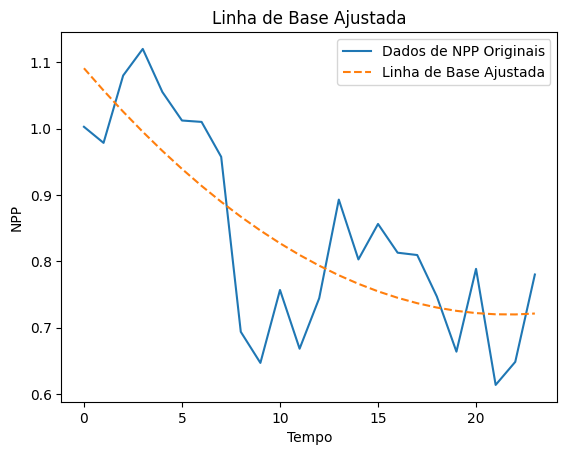

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as s

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_3y_monthly.csv')
df_1y

anos_perturbacao = []
ano_inicial = 1980
ano_final = 2016

for ano in range(ano_inicial, ano_final + 1, 2):
    anos_perturbacao.append(ano)
# print(anos_perturbacao)

years_with_perturbation = anos_perturbacao
npp_data = df_1y['npp']
for year_perturbacao in years_with_perturbation:
    # Calcule os índices correspondentes ao ano de perturbação e ao ano anterior
    index_perturbacao = (year_perturbacao - 1979) * 12  
    # print(year_perturbacao, index_perturbacao)
    # 1979 é o primeiro ano, então multiplicamos por 12 para encontrar o índice do primeiro mês desse ano
    index_ano_anterior = index_perturbacao - 12  # O ano anterior tem 12 meses
    # print(index_ano_anterior)
    # Se o ano anterior for menor que zero, significa que estamos no primeiro ano de perturbação e não há um ano anterior
    if index_ano_anterior < 0:
        continue  # Pule este ano de perturbação
        
    # Selecione os dados de NPP para o ano de perturbação e o ano anterior
    npp_subset = npp_data[index_ano_anterior:index_perturbacao + 12]  
    # Adicionamos 12 ao índice de perturbação para incluir todo o ano
    # print(year_perturbacao,npp_subset)
     # Definir o tempo como o número de meses desde o início dos dados
    time = np.arange(len(npp_subset))
    # print(time)

# Definir a função da curva quadrática:
# Você precisa definir uma função que represente uma curva quadrática. 
# Esta função terá três parâmetros: a, b e c, que são os coeficientes da curva quadrática
def quadratic_curve(x, a, b, c):
    return a * x**2 + b * x + c

# Ajustar a curva quadrática aos dados:
# Usando a função curve_fit do scipy.optimize, 
# você pode ajustar a curva quadrática aos dados de NPP para cada evento de perturbação.
# Ajustar a curva quadrática aos dados
popt, _ = s.curve_fit(quadratic_curve, time, npp_subset)

baseline_curves = []
# Armazenar os parâmetros ajustados:
# Depois de ajustar a curva quadrática aos dados de NPP, 
# você precisa armazenar os parâmetros ajustados (a, b, c) para cada evento de perturbação. 
# Você pode fazer isso adicionando-os a uma lista:
baseline_curves.append(popt)

# Calcular os valores estimados de NPP usando a curva quadrática ajustada
npp_baseline = quadratic_curve(time, *popt)

# Plotar os dados de NPP originais e a linha de base ajustada
plt.plot(time, npp_subset, label='Dados de NPP Originais')
plt.plot(time, npp_baseline, label='Linha de Base Ajustada', linestyle='--')
plt.xlabel('Tempo')
plt.ylabel('NPP')
plt.title('Linha de Base Ajustada')
plt.legend()
plt.show()

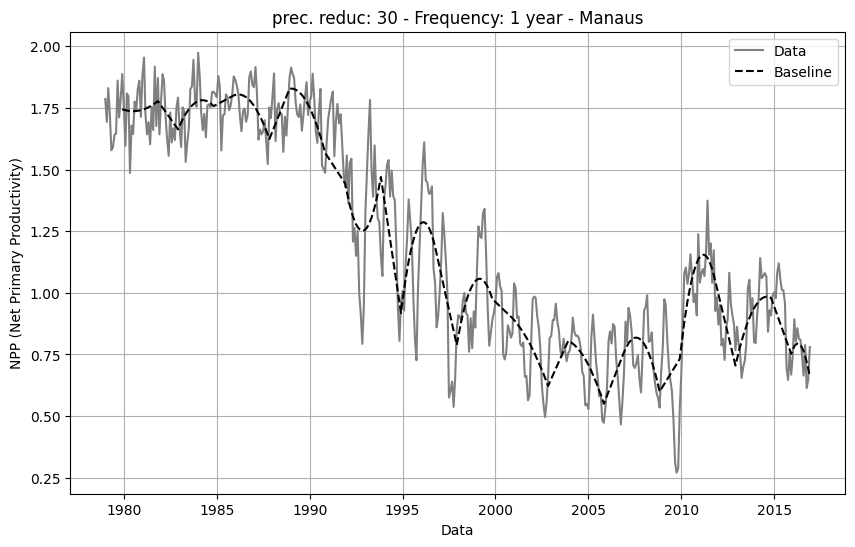

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_3y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Ordenar o DataFrame por data
df_1y = df_1y.sort_values(by='date')

# Inicializar listas para armazenar os resultados do ajuste
dates_fit = []
npp_fit_values = []

# Encontrar os índices de dezembro para o início e o fim da série temporal
start_index = df_1y[df_1y['date'].dt.month == 12].index[0]
end_index = df_1y[df_1y['date'].dt.month == 12].index[-1]

# Iterar sobre a série temporal em intervalos de dois anos
for i in range(start_index, end_index, 36):  # 24 meses correspondem a dois anos
    # Subconjunto de dados a partir de dezembro de um ano até dezembro do próximo ano
    subset = df_1y.iloc[i:i + 24]  # 24 meses correspondem a dois anos
    
    # Ajustar uma curva quadrática ao subconjunto
    coefficients = np.polyfit(np.arange(len(subset)), subset['npp'], 2)
    quadratic_fit = np.poly1d(coefficients)
    
    # Adicionar pontos ajustados à lista
    dates_fit.extend(subset['date'])
    npp_fit_values.extend(quadratic_fit(np.arange(len(subset))))

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df_1y['date'], df_1y['npp'], label='Data', color = 'grey')
plt.plot(dates_fit, npp_fit_values, label='Baseline', linestyle='--', color='black')
plt.xlabel('Data')
plt.ylabel('NPP (Net Primary Productivity)')
plt.title('prec. reduc: 30 - Frequency: 1 year - Manaus')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_3y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Ordenar o DataFrame por data
df_1y = df_1y.sort_values(by='date')
df_1y['quadratic_fit'] = np.poly1d(np.polyfit(np.arange(len(df_1y)), df_1y['npp'], 2))(np.arange(len(df_1y)))

# Calcular ε0 (NPP da baseline)
epsilon_0 = df_1y['quadratic_fit'].values

# Calcular εc (NPP dos dados originais)
epsilon_c = df_1y['npp'].values

# Calcular -ln(ε0 - εc)
minus_ln_epsilon_diff = -np.log(epsilon_0 - epsilon_c)

# Adicionar -ln(ε0 - εc) como uma coluna no DataFrame
df_1y['minus_ln_epsilon_diff'] = minus_ln_epsilon_diff

# Adicionar o tempo como uma coluna no DataFrame (em meses, por exemplo)
df_1y['time_months'] = np.arange(len(df_1y))

# Ajustar uma regressão linear de -ln(ε0 - εc) contra o tempo
X = df_1y[['time_months']]
y = df_1y['minus_ln_epsilon_diff']

linear_model = LinearRegression()
linear_model.fit(X, y)

# Coeficiente angular (λ) é o coeficiente da regressão linear
recovery_rate_lambda = linear_model.coef_[0]

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(df_1y['time_months'], df_1y['minus_ln_epsilon_diff'], label='-ln(ε0 - εc)', marker='o')
plt.plot(df_1y['time_months'], linear_model.predict(X), label='Regressão Linear', linestyle='--', color='red')
plt.xlabel('Tempo (meses)')
plt.ylabel('-ln(ε0 - εc)')
plt.title('Regressão Linear para Calcular a Taxa de Recuperação (λ)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir o valor de λ
print(f"Taxa de Recuperação (λ): {recovery_rate_lambda}")

/tmp/ipykernel_4399/4105899278.py:21: RuntimeWarning: invalid value encountered in log
  minus_ln_epsilon_diff = -np.log(epsilon_0 - epsilon_c)


ValueError: Input y contains NaN.

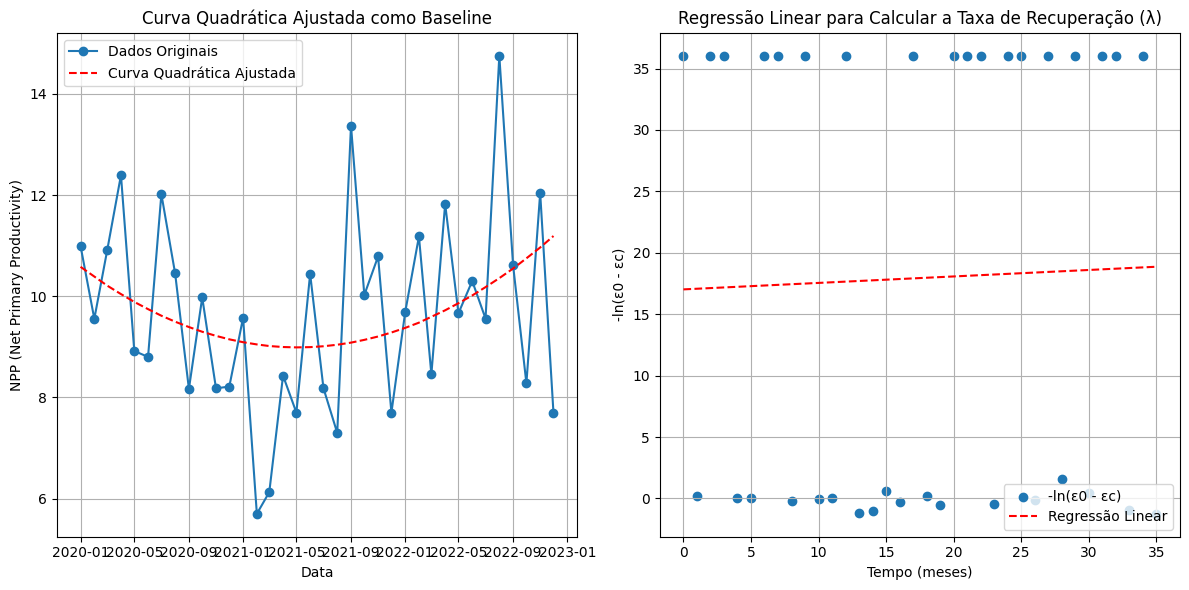

Taxa de Recuperação (λ): 0.05266484072926459


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Criar um exemplo hipotético
np.random.seed(42)

# Gerar dados para 'date' de janeiro de 2020 a dezembro de 2022
date_range = pd.date_range(start='2020-01-01', end='2022-12-01', freq='MS')
df_hypothetical = pd.DataFrame({'date': date_range})

# Gerar dados hipotéticos para 'npp'
df_hypothetical['npp'] = np.random.normal(loc=10, scale=2, size=len(df_hypothetical))

# Adicionar um efeito de perturbação
df_hypothetical['npp_perturbed'] = df_hypothetical['npp'] * (1 - 0.1 * np.sin(2 * np.pi * df_hypothetical.index / len(df_hypothetical)))

# Adicionar uma curva quadrática ajustada como uma coluna no DataFrame
df_hypothetical['quadratic_fit'] = np.poly1d(np.polyfit(np.arange(len(df_hypothetical)), df_hypothetical['npp_perturbed'], 2))(np.arange(len(df_hypothetical)))

# Calcular ε0 (NPP da baseline)
epsilon_0 = df_hypothetical['quadratic_fit'].values

# Calcular εc (NPP dos dados originais)
epsilon_c = df_hypothetical['npp_perturbed'].values

# Lidar com valores negativos ou zero na diferença
epsilon_diff = epsilon_0 - epsilon_c
epsilon_diff[epsilon_diff <= 0] = np.finfo(float).eps  # Substituir valores não positivos por um valor próximo de zero

# Calcular -ln(ε0 - εc)
minus_ln_epsilon_diff = -np.log(epsilon_diff)

# Adicionar -ln(ε0 - εc) como uma coluna no DataFrame
df_hypothetical['minus_ln_epsilon_diff'] = minus_ln_epsilon_diff

# Adicionar o tempo como uma coluna no DataFrame (em meses, por exemplo)
df_hypothetical['time_months'] = np.arange(len(df_hypothetical))

# Ajustar uma regressão linear de -ln(ε0 - εc) contra o tempo
X = df_hypothetical[['time_months']]
y = df_hypothetical['minus_ln_epsilon_diff']

linear_model = LinearRegression()
linear_model.fit(X, y)

# Coeficiente angular (λ) é o coeficiente da regressão linear
recovery_rate_lambda = linear_model.coef_[0]

# Plotar os resultados
plt.figure(figsize=(12, 6))

# Plotar NPP dos dados originais e curva quadrática ajustada
plt.subplot(1, 2, 1)
plt.plot(df_hypothetical['date'], df_hypothetical['npp_perturbed'], label='Dados Originais', marker='o')
plt.plot(df_hypothetical['date'], df_hypothetical['quadratic_fit'], label='Curva Quadrática Ajustada', linestyle='--', color='red')
plt.xlabel('Data')
plt.ylabel('NPP (Net Primary Productivity)')
plt.title('Curva Quadrática Ajustada como Baseline')
plt.legend()
plt.grid(True)

# Plotar -ln(ε0 - εc) e a regressão linear
plt.subplot(1, 2, 2)
plt.scatter(df_hypothetical['time_months'], df_hypothetical['minus_ln_epsilon_diff'], label='-ln(ε0 - εc)', marker='o')
plt.plot(df_hypothetical['time_months'], linear_model.predict(X), label='Regressão Linear', linestyle='--', color='red')
plt.xlabel('Tempo (meses)')
plt.ylabel('-ln(ε0 - εc)')
plt.title('Regressão Linear para Calcular a Taxa de Recuperação (λ)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir o valor de λ
print(f"Taxa de Recuperação (λ): {recovery_rate_lambda}")


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerar dados de atenuação de luz hipotéticos ao longo do tempo
tempo = np.arange(0, 61)  # Dados para 5 anos (60 meses)
atenuacao_luz = np.random.uniform(0.2, 0.8, len(tempo))  # Atenuação de luz variável

# Identificar os momentos das perturbações (a cada 12 meses)
perturbacoes = np.arange(12, len(tempo), 12)

# Construir a linha de base para cada período entre as perturbações
quadratic_fits = []
for i in range(len(perturbacoes) - 1):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    quadratic_fit = np.poly1d(np.polyfit(tempo[inicio_periodo:fim_periodo], atenuacao_luz[inicio_periodo:fim_periodo], 2))
    quadratic_fits.append(quadratic_fit)

# Calcular a taxa de recuperação (coeficiente angular) para cada período entre as perturbações
recovery_rate_lambdas = []
for i, quadratic_fit in enumerate(quadratic_fits):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    X = np.arange(inicio_periodo, fim_periodo).reshape(-1, 1)
    y = -np.log(np.maximum(quadratic_fit(np.arange(inicio_periodo, fim_periodo)) - atenuacao_luz[inicio_periodo:fim_periodo], 1e-10))
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    recovery_rate_lambdas.append(linear_model.coef_[0])

# Imprimir as taxas de recuperação para cada período entre as perturbações
for i, recovery_rate_lambda in enumerate(recovery_rate_lambdas):
    print(f'Taxa de Recuperação - Período {i+1}: {recovery_rate_lambda:.4f} (por mês)')


Taxa de Recuperação - Período 1: -0.3151 (por mês)
Taxa de Recuperação - Período 2: 0.3486 (por mês)
Taxa de Recuperação - Período 3: 0.1935 (por mês)
Taxa de Recuperação - Período 4: 0.3096 (por mês)


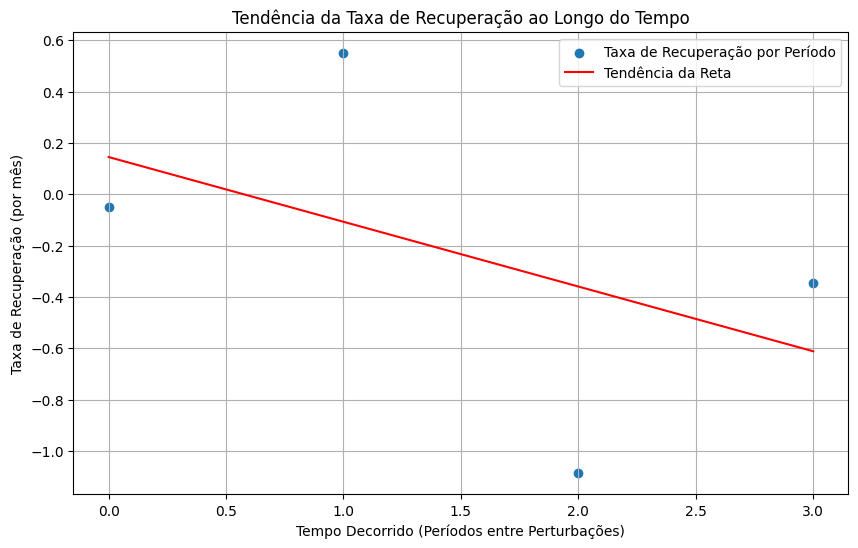

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerar dados de atenuação de luz hipotéticos ao longo do tempo
tempo = np.arange(0, 61)  # Dados para 5 anos (60 meses)
atenuacao_luz = np.random.uniform(0.2, 0.8, len(tempo))  # Atenuação de luz variável

# Identificar os momentos das perturbações (a cada 12 meses)
perturbacoes = np.arange(12, len(tempo), 12)

# Construir a linha de base para cada período entre as perturbações
quadratic_fits = []
for i in range(len(perturbacoes) - 1):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    quadratic_fit = np.poly1d(np.polyfit(tempo[inicio_periodo:fim_periodo], atenuacao_luz[inicio_periodo:fim_periodo], 2))
    quadratic_fits.append(quadratic_fit)

# Calcular a taxa de recuperação (coeficiente angular) para cada período entre as perturbações
recovery_rate_lambdas = []
for i, quadratic_fit in enumerate(quadratic_fits):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    X = np.arange(inicio_periodo, fim_periodo).reshape(-1, 1)
    y = -np.log(np.maximum(quadratic_fit(np.arange(inicio_periodo, fim_periodo)) - atenuacao_luz[inicio_periodo:fim_periodo], 1e-10))
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    recovery_rate_lambdas.append(linear_model.coef_[0])

# Calcular o tempo decorrido desde o início do experimento para cada período entre as perturbações
tempo_decorrido = np.arange(len(recovery_rate_lambdas))

# Ajustar uma reta entre as taxas de recuperação e o tempo decorrido
linear_model = LinearRegression()
linear_model.fit(tempo_decorrido.reshape(-1, 1), recovery_rate_lambdas)
tendencia_reta = linear_model.predict(tempo_decorrido.reshape(-1, 1))

# Plotar as taxas de recuperação e a tendência da reta
plt.figure(figsize=(10, 6))
plt.scatter(tempo_decorrido, recovery_rate_lambdas, label='Taxa de Recuperação por Período')
plt.plot(tempo_decorrido, tendencia_reta, color='red', label='Tendência da Reta')
plt.xlabel('Tempo Decorrido (Períodos entre Perturbações)')
plt.ylabel('Taxa de Recuperação (por mês)')
plt.title('Tendência da Taxa de Recuperação ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()


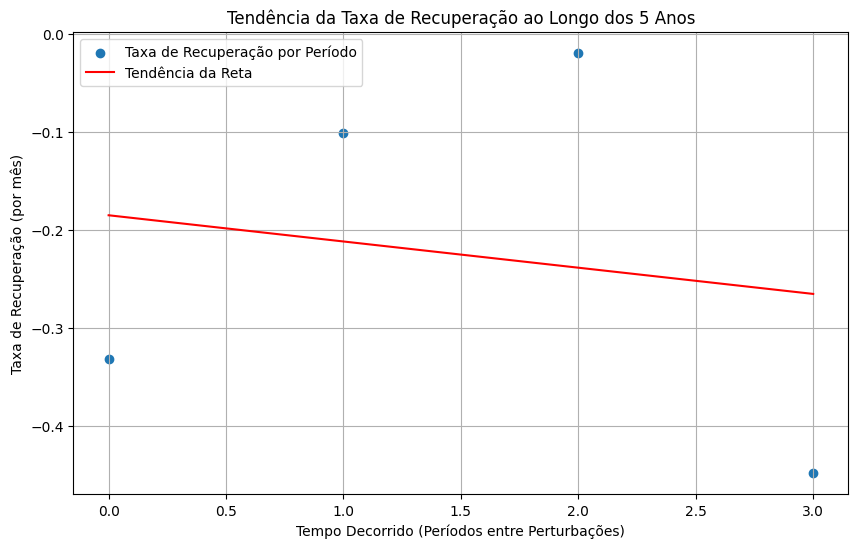

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerar dados de atenuação de luz hipotéticos ao longo do tempo
tempo = np.arange(0, 61)  # Dados para 5 anos (60 meses)
atenuacao_luz = np.random.uniform(0.2, 0.8, len(tempo))  # Atenuação de luz variável

# Identificar os momentos das perturbações (a cada 12 meses)
perturbacoes = np.arange(12, len(tempo), 12)

# Construir a linha de base para cada período entre as perturbações
quadratic_fits = []
for i in range(len(perturbacoes) - 1):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    quadratic_fit = np.poly1d(np.polyfit(tempo[inicio_periodo:fim_periodo], atenuacao_luz[inicio_periodo:fim_periodo], 2))
    quadratic_fits.append(quadratic_fit)

# Calcular a taxa de recuperação (coeficiente angular) para cada período entre as perturbações
recovery_rate_lambdas = []
for i, quadratic_fit in enumerate(quadratic_fits):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    X = np.arange(inicio_periodo, fim_periodo).reshape(-1, 1)
    y = -np.log(np.maximum(quadratic_fit(np.arange(inicio_periodo, fim_periodo)) - atenuacao_luz[inicio_periodo:fim_periodo], 1e-10))
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    recovery_rate_lambdas.append(linear_model.coef_[0])

# Calcular o tempo decorrido desde o início do experimento para cada período entre as perturbações
tempo_decorrido = np.arange(len(recovery_rate_lambdas))

# Ajustar uma reta entre as taxas de recuperação e o tempo decorrido desde o início do experimento
linear_model = LinearRegression()
linear_model.fit(tempo_decorrido.reshape(-1, 1), recovery_rate_lambdas)
tendencia_reta = linear_model.predict(tempo_decorrido.reshape(-1, 1))

# Plotar as taxas de recuperação e a tendência da reta
plt.figure(figsize=(10, 6))
plt.scatter(tempo_decorrido, recovery_rate_lambdas, label='Taxa de Recuperação por Período')
plt.plot(tempo_decorrido, tendencia_reta, color='red', label='Tendência da Reta')
plt.xlabel('Tempo Decorrido (Períodos entre Perturbações)')
plt.ylabel('Taxa de Recuperação (por mês)')
plt.title('Tendência da Taxa de Recuperação ao Longo dos 5 Anos')
plt.legend()
plt.grid(True)
plt.show()


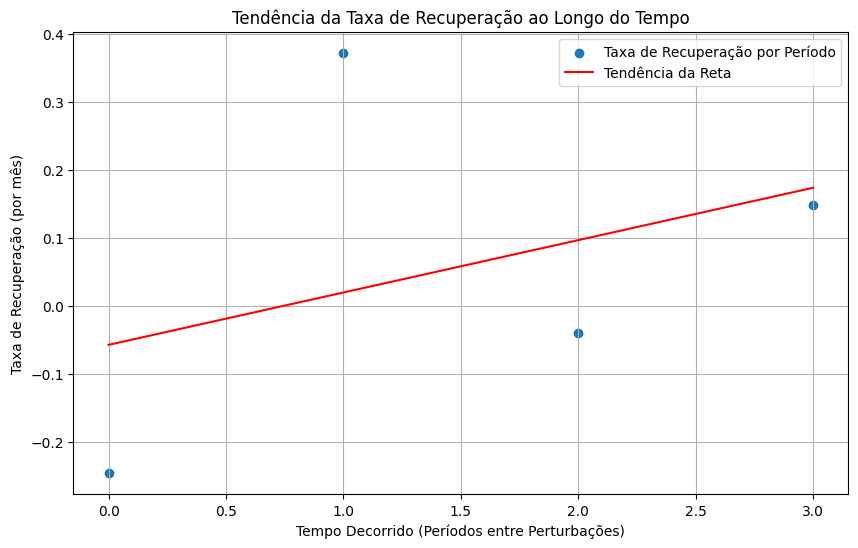

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerar dados de atenuação de luz hipotéticos ao longo do tempo
tempo = np.arange(0, 61)  # Dados para 5 anos (60 meses)
atenuacao_luz = np.random.uniform(0.2, 0.8, len(tempo))  # Atenuação de luz variável

# Identificar os momentos das perturbações (a cada 12 meses)
perturbacoes = np.arange(12, len(tempo), 12)

# Construir a linha de base para cada período entre as perturbações
quadratic_fits = []
for i in range(len(perturbacoes) - 1):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    quadratic_fit = np.poly1d(np.polyfit(tempo[inicio_periodo:fim_periodo], atenuacao_luz[inicio_periodo:fim_periodo], 2))
    quadratic_fits.append(quadratic_fit)

# Calcular a taxa de recuperação (coeficiente angular) para cada período entre as perturbações
recovery_rate_lambdas = []
for i, quadratic_fit in enumerate(quadratic_fits):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    X = np.arange(inicio_periodo, fim_periodo).reshape(-1, 1)
    y = -np.log(np.maximum(quadratic_fit(np.arange(inicio_periodo, fim_periodo)) - atenuacao_luz[inicio_periodo:fim_periodo], 1e-10))
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    recovery_rate_lambdas.append(linear_model.coef_[0])

# Calcular o tempo decorrido desde o início do experimento para cada período entre as perturbações
tempo_decorrido = np.arange(len(recovery_rate_lambdas))

# Ajustar uma reta entre as taxas de recuperação e o tempo decorrido desde o início do experimento
linear_model = LinearRegression()
linear_model.fit(tempo_decorrido.reshape(-1, 1), recovery_rate_lambdas)
tendencia_reta = linear_model.predict(tempo_decorrido.reshape(-1, 1))

# Plotar as taxas de recuperação e a tendência da reta
plt.figure(figsize=(10, 6))
plt.scatter(tempo_decorrido, recovery_rate_lambdas, label='Taxa de Recuperação por Período')
plt.plot(tempo_decorrido, tendencia_reta, color='red', label='Tendência da Reta')
plt.xlabel('Tempo Decorrido (Períodos entre Perturbações)')
plt.ylabel('Taxa de Recuperação (por mês)')
plt.title('Tendência da Taxa de Recuperação ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()


ValueError: x and y must be the same size

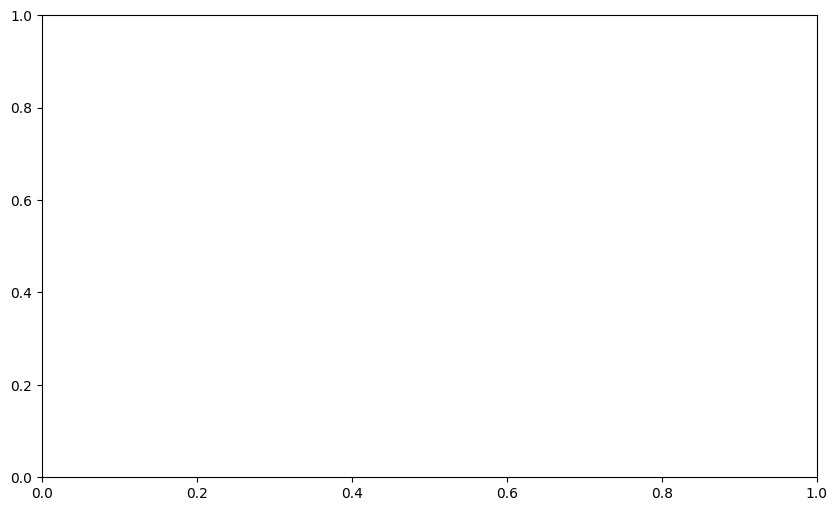

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerar dados de atenuação de luz hipotéticos ao longo do tempo
tempo = np.arange(0, 61)  # Dados para 5 anos (60 meses)
atenuacao_luz = np.random.uniform(0.2, 0.8, len(tempo))  # Atenuação de luz variável

# Identificar os momentos das perturbações (a cada 12 meses)
perturbacoes = np.arange(12, len(tempo), 12)

# Construir a linha de base para cada período entre as perturbações
quadratic_fits = []
for i in range(len(perturbacoes) - 1):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    quadratic_fit = np.poly1d(np.polyfit(tempo[inicio_periodo:fim_periodo], atenuacao_luz[inicio_periodo:fim_periodo], 2))
    quadratic_fits.append(quadratic_fit)

# Calcular a taxa de recuperação (coeficiente angular) para cada período entre as perturbações
recovery_rate_lambdas = []
for i, quadratic_fit in enumerate(quadratic_fits):
    inicio_periodo = perturbacoes[i]
    fim_periodo = perturbacoes[i+1]
    X = np.arange(inicio_periodo, fim_periodo).reshape(-1, 1)
    y = -np.log(np.maximum(quadratic_fit(np.arange(inicio_periodo, fim_periodo)) - atenuacao_luz[inicio_periodo:fim_periodo], 1e-10))
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    recovery_rate_lambdas.append(linear_model.coef_[0])

# Calcular o tempo decorrido desde o início do experimento para cada período entre as perturbações
tempo_decorrido = np.arange(len(recovery_rate_lambdas))

# Ajustar uma reta entre as taxas de recuperação e o tempo decorrido desde o início do experimento
linear_model = LinearRegression()
linear_model.fit(tempo_decorrido.reshape(-1, 1), recovery_rate_lambdas)
tendencia_reta = linear_model.predict(np.arange(len(tempo)).reshape(-1, 1))

# Plotar as taxas de recuperação e a tendência da reta
plt.figure(figsize=(10, 6))
plt.scatter(tempo, recovery_rate_lambdas, label='Taxa de Recuperação por Período')
plt.plot(np.arange(len(tempo)), tendencia_reta, color='red', label='Tendência da Reta')
plt.xlabel('Tempo Decorrido (Meses)')
plt.ylabel('Taxa de Recuperação (por mês)')
plt.title('Tendência da Taxa de Recuperação ao Longo dos 5 Anos')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supondo que 'df_1y' já está no formato certo com 'date' e 'npp' como colunas
# Se necessário, converta 'date' para datetime: df_1y['date'] = pd.to_datetime(df_1y['date'])
# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')
df_1y['date'] = pd.to_datetime(df_1y['date'])


# Ordenar o DataFrame por data
df_1y = df_1y.sort_values(by='date')

# Inicializar listas para armazenar os resultados do ajuste
dates_fit = []
npp_fit_values = []

# Encontrar os índices de dezembro para o início e o fim da série temporal
start_index = df_1y[df_1y['date'].dt.month == 12].index[0]
end_index = df_1y[df_1y['date'].dt.month == 12].index[-1]

print(start_index)
print(end_index)


11
455


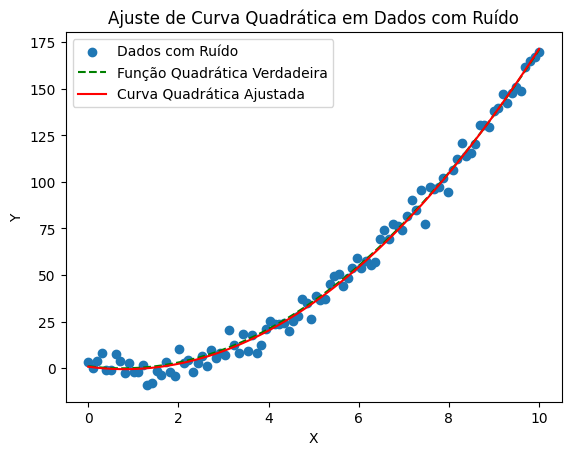

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados fictícios
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_true = 2 * x**2 - 3 * x + 1  # Função quadrática fictícia
noise = np.random.normal(0, 5, size=len(x))
y_noisy = y_true + noise

# Ajustar uma curva quadrática (polinômio de segundo grau)
coefficients = np.polyfit(x, y_noisy, 2)
quadratic_fit = np.poly1d(coefficients)

# Gerar pontos na curva ajustada
y_fit = quadratic_fit(x)

# Visualizar os resultados
plt.scatter(x, y_noisy, label='Dados com Ruído')
plt.plot(x, y_true, label='Função Quadrática Verdadeira', linestyle='--', color='green')
plt.plot(x, y_fit, label='Curva Quadrática Ajustada', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de Curva Quadrática em Dados com Ruído')
plt.show()


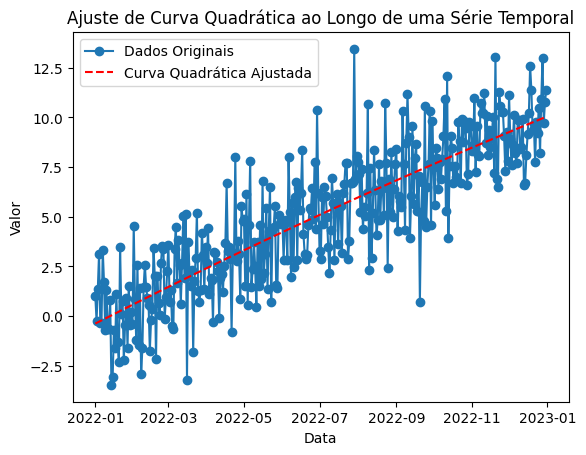

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criar uma série temporal fictícia
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = np.linspace(0, 10, num=len(date_rng)) + np.random.normal(0, 2, size=len(date_rng))
df = pd.DataFrame(data, columns=['Value'], index=date_rng)

# Ajustar uma curva quadrática (polinômio de segundo grau)
coefficients = np.polyfit(np.arange(len(df)), df['Value'], 2)
quadratic_fit = np.poly1d(coefficients)

# Adicionar uma coluna com os valores ajustados
df['Quadratic Fit'] = quadratic_fit(np.arange(len(df)))

# Visualizar os resultados
plt.plot(df.index, df['Value'], label='Dados Originais', marker='o')
plt.plot(df.index, df['Quadratic Fit'], label='Curva Quadrática Ajustada', linestyle='--', color='red')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Ajuste de Curva Quadrática ao Longo de uma Série Temporal')
plt.legend()
plt.show()


/tmp/ipykernel_4446/2857385073.py:17: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.arange(len(subset)), subset['Value'], 2)
/tmp/ipykernel_4446/2857385073.py:17: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.arange(len(subset)), subset['Value'], 2)
/tmp/ipykernel_4446/2857385073.py:17: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.arange(len(subset)), subset['Value'], 2)
/tmp/ipykernel_4446/2857385073.py:17: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.arange(len(subset)), subset['Value'], 2)
/tmp/ipykernel_4446/2857385073.py:17: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.arange(len(subset)), subset['Value'], 2)
/tmp/ipykernel_4446/2857385073.py:17: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.arange(len(subset)), subset['Value'], 2)
/tmp/ipykernel_4446/2857385073.py:17: RankWarning: Polyfit

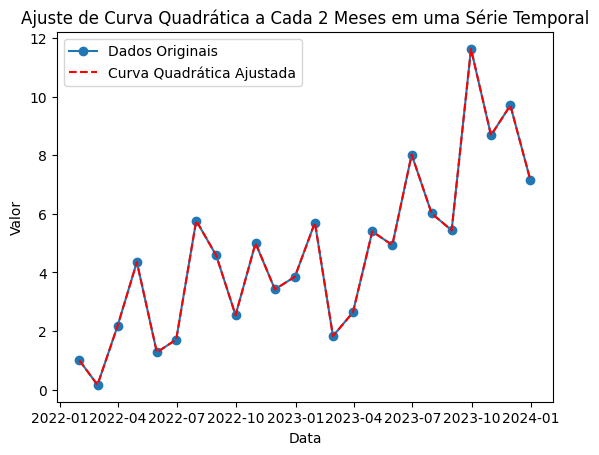

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criar uma série temporal fictícia com intervalo mensal
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='M')
data = np.linspace(0, 10, num=len(date_rng)) + np.random.normal(0, 2, size=len(date_rng))
df = pd.DataFrame(data, columns=['Value'], index=date_rng)

# Ajustar uma curva quadrática (polinômio de segundo grau) a cada 2 meses
window_size = 2  # em meses
fit_values = []

for i in range(0, len(df), window_size):
    subset = df.iloc[i:i + window_size]
    coefficients = np.polyfit(np.arange(len(subset)), subset['Value'], 2)
    quadratic_fit = np.poly1d(coefficients)
    fit_values.extend(quadratic_fit(np.arange(len(subset))))

# Adicionar uma coluna com os valores ajustados
df['Quadratic Fit'] = fit_values

# Visualizar os resultados
plt.plot(df.index, df['Value'], label='Dados Originais', marker='o')
plt.plot(df.index, df['Quadratic Fit'], label='Curva Quadrática Ajustada', linestyle='--', color='red')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Ajuste de Curva Quadrática a Cada 2 Meses em uma Série Temporal')
plt.legend()
plt.show()


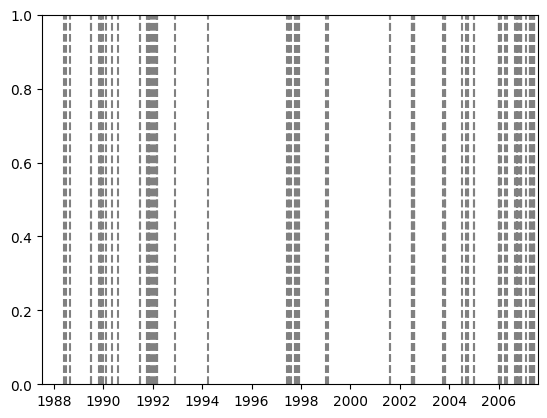

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_variable_over_time(df, freq, variable_column, df_bp_path, save_path=None):
    # Leitura do DataFrame df_bp
    df_bp = pd.read_csv(df_bp_path)

    # Extração do número da variável freq
    freq_number = int(freq[:-1])
    # print(freq_number)
    # Filtragem do DataFrame df_bp
    filtered_df_bp = df_bp[(df_bp['Frequency_y'] == freq_number) & (df_bp['variable'] == variable_column)]
    # print(variable_column)
    # Adicionando as colunas 'bp1' e 'bp2' em df e convertendo para o formato de data
    df['bp1'], df['bp2'] = pd.to_datetime(filtered_df_bp['break_point1'].values[0]), pd.to_datetime(filtered_df_bp['break_point2'].values[0])
    df['date'] = pd.to_datetime(df['date'])
    # print(df['bp1'], df['bp2'])
    # Plotando o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df[variable_column], label=variable_column, color='black')
    for bp_column in ['bp1', 'bp2']:
        plt.axvline(df[bp_column].iloc[0], color='grey', linestyle='--', label=bp_column)

    plt.xlabel('Date')
    plt.ylabel(variable_column.capitalize())
    plt.title(f'{variable_column.capitalize()} over Time')
    plt.legend()

    # Salvando a imagem se save_path for fornecido
    if save_path:
        plt.savefig(os.path.join(save_path, f'{variable_column}_plot_{freq}.png'))
        plt.close()  # Fechando a figura após salvar para evitar a exibição duplicada no notebook


# Caminho para salvar as imagens
save_directory = '/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/plots_breaks'
# Caminho correto para o arquivo df_bp
df_bp_path = '/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/bfast/breakpoints_dates_bfast.csv'

# Criando o diretório se ele não existir
os.makedirs(save_directory, exist_ok=True)

# Lista de anos
frequency = ['1y', '3y', '5y', '7y']

# Lista de variáveis
variaveis = ['npp', 'photo', 'cleaf', 'croot', 'cwood', 'cheart', 'csap', 'csto', 'evapm', 'ar', 'lai', 'f5', 'ctotal', 'wue']

# Iterando sobre os anos e as variáveis para gerar os plots
for freq in frequency:
    for variavel in variaveis:
        file_path = f'/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_{freq}_monthly.csv'
        df = pd.read_csv(file_path)
        # plot_variable_over_time(df,  freq, variavel, '/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/bfast/breakpoints_dates_bfast.csv', save_path=None)
        plot_variable_over_time(df,  freq, variavel, '/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/bfast/breakpoints_dates_bfast.csv', save_path=save_directory)

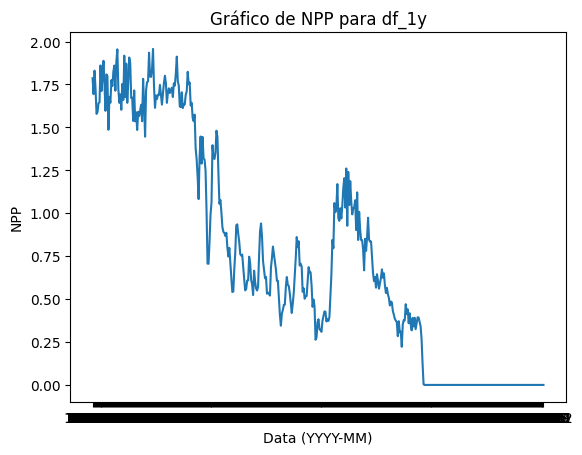

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados
df_1y = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/monthly_mean_tables/MAN_30prec_1y_monthly.csv')

# Certifique-se de que a coluna 'date' está no formato de data
df_1y['date'] = pd.to_datetime(df_1y['date'])

# Extrair apenas o componente de mês e ano da coluna 'date'
df_1y['date'] = df_1y['date'].dt.to_period('M').astype(str)

# Plotar o gráfico para df_1y e a variável 'npp'
plt.plot(df_1y['date'], df_1y['npp'])
plt.xlabel('Data (YYYY-MM)')
plt.ylabel('NPP')
plt.title('Gráfico de NPP para df_1y')
plt.show()


In [ ]:
from PIL import Image
import os

# Especifica o caminho para a pasta que contém os arquivos PNG
folder_path = '/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/csv_allvar'


# Lista todos os arquivos na pasta
file_list = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Cria uma lista de objetos de imagem
images = [Image.open(os.path.join(folder_path, file)) for file in file_list]

# Define o número de colunas e linhas desejado
num_columns = 2
num_rows = 7

# Calcula as dimensões da imagem combinada
width, height = images[0].size
combined_width = num_columns * width
combined_height = num_rows * height

# Cria uma nova imagem grande para combinar todas as outras
combined_image = Image.new('RGB', (combined_width, combined_height))

# Cola cada imagem na imagem combinada, seguindo o layout especificado
for i, image in enumerate(images):
    col = i % num_columns
    row = i // num_columns
    combined_image.paste(image, (col * width, row * height))

# Salva a imagem combinada
combined_image.save(os.path.join(folder_path, 'combined_output.png'))

: 

TypeError: 'value' must be an instance of str or bytes, not a float

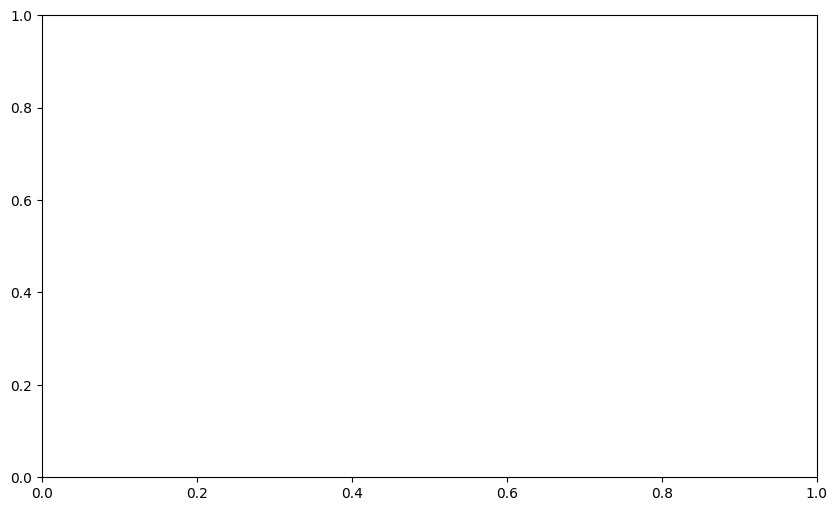

In [15]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the path to the folder containing CSV files
folder_path = '/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/csv_allvar'

# List all files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize a dictionary to store dataframes
dataframes = {}

# Iterate through the files and load each CSV into a dataframe
for csv_file in csv_files:
    # Extract variable name from the file name (without extension)
    variable_name = os.path.splitext(csv_file)[0]
    
    # Full path to the CSV file
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a dataframe and store it in the dictionary
    dataframes[variable_name] = pd.read_csv(file_path)

# Identify unique suffixes after the underscore
unique_suffixes = set(name.split('_')[-1] for name in dataframes.keys())
# Iterate through unique suffixes and concatenate dataframes with the same suffix
for suffix in unique_suffixes:
    matching_dfs = [df for name, df in dataframes.items() if name.endswith(suffix)]
    combined_df = pd.concat(matching_dfs, axis=0, ignore_index=True, sort=False)
    # Substitua todos os valores nulos por 'NA'
    combined_df = combined_df.fillna('NA')
    # Converter a coluna 'frequency' para strings
    combined_df['frequency'] = combined_df['frequency'].astype(str)

    # Supondo que o DataFrame tem uma coluna 'timeindex' e uma coluna 'ar1'
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='timeindex', y='ar1', hue='frequency', data=combined_df, palette='viridis')
    
    plt.title(f'Curvas AR1 para Sufixo {suffix}')
    plt.xlabel('Índice de Tempo')
    plt.ylabel('AR1 Value')
    plt.legend(title='Frequência', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    
    # Salvar a figura se necessário
    plt.savefig(f'{folder_path}/{suffix}_ar1_curves.png')

    # Exibir o gráfico
    plt.show()


    # Agora, salve o DataFrame no arquivo CSV
    # combined_df.to_csv(f'{folder_path}/{suffix}_ews.csv', index=False)




<Axes: xlabel='timeindex', ylabel='ar1'>

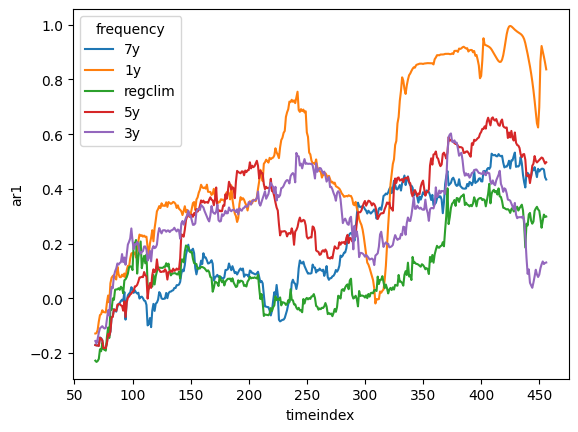

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/csv_allvar/ar_ews.csv')

sns.lineplot(x='timeindex', y = 'ar1', hue = 'frequency',data=df)

In [2]:
import os
import pandas as pd
import warnings
import numpy as np

folder_path = '/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/csv_allvar/csv_allvar_original/'  # Substitua pelo caminho correto

# Pasta para salvar os novos arquivos CSV
output_folder = '/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/csv_allvar/'  # Substitua pelo caminho correto

# Lista todos os arquivos na pasta
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Loop através de cada arquivo CSV
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)

    result = pd.read_csv(file_path)

    if result['timeindex'].iloc[0] != 1:
        print(f'O índice de tempo não é 1 para o arquivo {csv_file}')

        additional_rows = pd.DataFrame({
            'timeindex': range(1, result['timeindex'].iloc[0]),
            'ar1': [np.nan] * (result['timeindex'].iloc[0] - 1),
            'var': [result['var'].iloc[0]] * (result['timeindex'].iloc[0] - 1),
            'frequency': [result['frequency'].iloc[0]] * (result['timeindex'].iloc[0] - 1)
        })

        # Substituir células vazias por "NA"
        additional_rows = additional_rows.replace(np.nan, 'NA')

        # Combinar o DataFrame original com as linhas adicionais
        result = pd.concat([additional_rows, result]).reset_index(drop=True)

        # Caminho para o novo arquivo CSV
        new_file_path = os.path.join(output_folder, f"new_{csv_file}")

        # Salvar o novo DataFrame em um novo arquivo CSV
        result.to_csv(new_file_path, index=False)
    else:
        print(f'O índice de tempo é 1 para o arquivo {csv_file}')




O índice de tempo não é 1 para o arquivo ews_results_7y_csap.csv
O índice de tempo não é 1 para o arquivo ews_results_1y_f5.csv
O índice de tempo não é 1 para o arquivo ews_results_3y_ar.csv
O índice de tempo não é 1 para o arquivo ews_results_3y_lai.csv
O índice de tempo não é 1 para o arquivo ews_results_7y_npp.csv
O índice de tempo não é 1 para o arquivo ews_results_regclim_f5.csv
O índice de tempo não é 1 para o arquivo ews_results_7y_csto.csv
O índice de tempo não é 1 para o arquivo ews_results_1y_ctotal.csv
O índice de tempo não é 1 para o arquivo ews_results_regclim_wue.csv
O índice de tempo não é 1 para o arquivo ews_results_1y_ar.csv
O índice de tempo não é 1 para o arquivo ews_results_1y_photo.csv
O índice de tempo não é 1 para o arquivo ews_results_regclim_cleaf.csv
O índice de tempo não é 1 para o arquivo ews_results_7y_croot.csv
O índice de tempo não é 1 para o arquivo ews_results_7y_ctotal.csv
O índice de tempo não é 1 para o arquivo ews_results_regclim_ctotal.csv
O índic

In [9]:
import pandas as pd

result = pd.read_csv('/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/csv_allvar/ews_results_1y_ar.csv')

if result['timeindex'].iloc[0] != 1:
    print('O índice de tempo não é 1')
    
    additional_rows = pd.DataFrame({
        'timeindex': range(1, result['timeindex'].iloc[0]),
        'ar1': [None] * (result['timeindex'].iloc[0] - 1),
        'var': [result['var'].iloc[0]] * (result['timeindex'].iloc[0] - 1),
        'frequency': [result['frequency'].iloc[0]] * (result['timeindex'].iloc[0] - 1)
    })
    
    result = pd.concat([additional_rows, result]).reset_index(drop=True)
else:
    print('O índice de tempo é 1')

print(result)


O índice de tempo não é 1
     timeindex       ar1 var frequency        sd        sk       kurt  \
0            1       NaN  ar        1y       NaN       NaN        NaN   
1            2       NaN  ar        1y       NaN       NaN        NaN   
2            3       NaN  ar        1y       NaN       NaN        NaN   
3            4       NaN  ar        1y       NaN       NaN        NaN   
4            5       NaN  ar        1y       NaN       NaN        NaN   
..         ...       ...  ..       ...       ...       ...        ...   
451        452  0.922231  ar        1y  0.000306  2.294572   6.728165   
452        453  0.903162  ar        1y  0.000284  2.500799   7.830990   
453        454  0.882914  ar        1y  0.000258  2.720809   9.112576   
454        455  0.861041  ar        1y  0.000228  2.955520  10.593369   
455        456  0.836882  ar        1y  0.000198  3.208140  12.314906   

           cv  returnrate   densratio      acf1  
0         NaN         NaN         NaN       NaN

/tmp/ipykernel_8646/2380181040.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([additional_rows, result]).reset_index(drop=True)


In [13]:
import pandas as pd
from PIL import Image

df = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/bfast/plots_ecosystem_functions/image_paths.csv")

# Criação da coluna 'image_path'
base_path = '/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/bfast/plots_ecosystem_functions/'
df['image_path'] = base_path + df['init'] + '_' + df['climate'] + '_' + df['var'] + '.png'

# Tamanho desejado para cada imagem na grade final
image_size = (400, 400)

# Organizar o DataFrame para criar uma imagem por 'var' e 'climate'
grouped_df = df.groupby(['var', 'climate'])

# Número de colunas e linhas na imagem final
num_cols = len(df['climate'].unique())
num_rows = len(df['var'].unique())

# Criação de uma imagem em branco com as dimensões desejadas
final_image = Image.new('RGB', (num_cols * image_size[0], num_rows * image_size[1]))

# Adição das imagens à imagem final na ordem desejada das colunas
column_order = ['regclim', '7y', '5y', '3y', '1y']
for i, ((var, climate), group) in enumerate(grouped_df):
    col_index = column_order.index(climate)
    img_path = group['image_path'].values[0]  # Pega apenas uma imagem para cada combinação única
    img = Image.open(img_path)
    img = img.resize(image_size)  # Ajuste o tamanho conforme necessário
    final_image.paste(img, (col_index * image_size[0], (i % num_rows) * image_size[1]))

# Salvar a imagem final
final_image.save(f'{base_path}/imagem_final.png')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Lista de caminhos para as imagens PNG
image_paths = [
    "/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/bfast/plots_ecosystem_functions/bfast_1y_ar.png",
    "/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/bfast/plots_ecosystem_functions/bfast_1y_cheart.png",
    # Adicione todos os caminhos das imagens aqui
    # ...
    "/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/bfast/plots_ecosystem_functions/bfast_regclim_wue.png",
]

# Criar uma matriz 5x14 de subplots
num_rows, num_cols = 5, 14
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 5))

# Desativar as marcas dos eixos
for ax in axs.flatten():
    ax.axis('off')

# Carregar imagens PNG e atribuir a cada subplot
for i in range(num_rows):
    for j in range(num_cols):
        img_index = i * num_cols + j
        if img_index < len(image_paths):
            img_path = image_paths[img_index]
            img = mpimg.imread(img_path)
            axs[i, j].imshow(img)

# Ajustar o layout para evitar sobreposições
plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import scipy.stats
import pandas as pd 

df = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/src/concatenated_series_MAN_30prec_1y.csv")
print(df.columns)
# # Certifique-se de que a coluna 'date' está no formato de data
# df['date'] = pd.to_datetime(df['Date'])

# # # Agrupe os dados por mês e faça a média da coluna 'npp'
# monthly_photo_mean = df.groupby(df['date'].dt.to_period("M"))['photo'].mean()

# # Crie um novo DataFrame com os resultados
# df_photo = pd.DataFrame({'Date': monthly_photo_mean.index, 'Monthly_photo_Mean': monthly_photo_mean.values})

# df_photo = df_photo['Monthly_photo_Mean']
# # print(df_photo)

# df_npp = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/src/MAN_30prec_1y_monthly.csv")
# df_npp = df_npp['Monthly_NPP_Mean']
# # print(df_npp)
# # Calculate Pearson correlation coefficient and p-value
# pearson, p_pearson = scipy.stats.pearsonr(df_npp, df_photo)

# spearman, p_spearman = scipy.stats.spearmanr(df_npp, df_photo)

# print(spearman, p_spearman)



Index(['photo', 'ar', 'npp', 'lai', 'f5', 'evapm', 'cleaf', 'cwood', 'croot',
       'csap', 'cheart', 'csto', 'wue', 'ls', 'Date', 'Spin'],
      dtype='object')


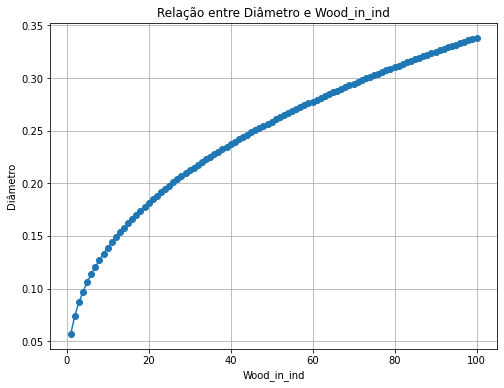

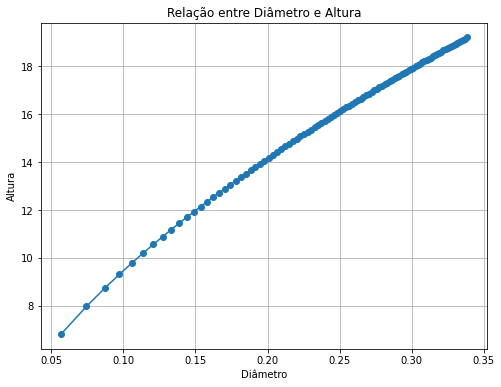

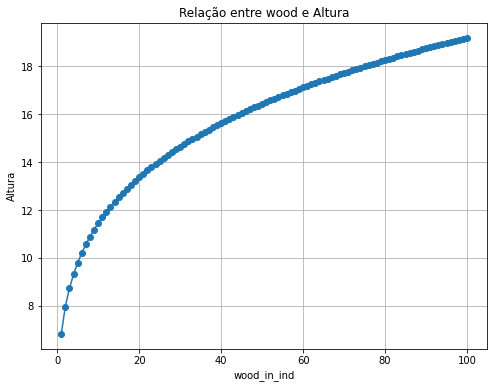

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74 * 1e6
k_allom2 = 36.
k_allom3 = 0.58
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(1, 100, 100)

# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind')
plt.ylabel('Diâmetro')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

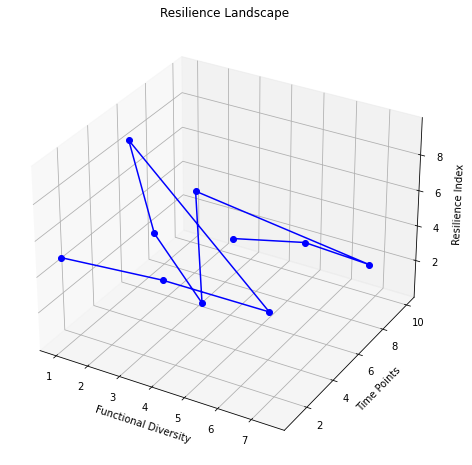

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data (replace with your actual data)
time_points = np.arange(1, 11)  # Example time points
functional_diversity = np.random.rand(len(time_points)) * 10  # Example functional diversity values
resilience_index = np.random.rand(len(time_points)) * 10  # Example resilience index values

# Create a Resilience Landscape
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the landscape
ax.plot(functional_diversity, time_points, resilience_index, marker='o', linestyle='-', color='b')

# Customize the plot
ax.set_xlabel('Functional Diversity')
ax.set_ylabel('Time Points')
ax.set_zlabel('Resilience Index')
ax.set_title('Resilience Landscape')

# Display the plot
plt.show()


In [6]:
import plotly.graph_objects as go
import numpy as np

# Sample data (replace with your actual data)
time_points = np.arange(1, 11)
functional_diversity = np.random.rand(len(time_points)) * 10
resilience_index = np.random.rand(len(time_points)) * 10

# Create a 3D surface plot
fig = go.Figure()

# Add a surface plot
fig.add_trace(go.Surface(
    x=functional_diversity,
    y=time_points,
    z=resilience_index,
    colorscale='Viridis',  # Choose a colorscale
))

# Customize the layout
fig.update_layout(scene=dict(
                    xaxis_title='Functional Diversity',
                    yaxis_title='Time Points',
                    zaxis_title='Resilience Index',
                    ),
                  )

# Show the plot
fig.show()


In [7]:
import plotly.graph_objects as go
import numpy as np

# Generate sample data
time_points = np.arange(1, 11)
functional_diversity = np.linspace(1, 10, len(time_points))
resilience_index = np.random.rand(len(time_points)) * 10

# Create a 3D surface plot
fig = go.Figure()

# Add a surface plot
fig.add_trace(go.Surface(
    x=functional_diversity,
    y=time_points,
    z=resilience_index,
    colorscale='Viridis',  # Choose a colorscale
))

# Customize the layout
fig.update_layout(scene=dict(
                    xaxis_title='Functional Diversity',
                    yaxis_title='Time Points',
                    zaxis_title='Resilience Index',
                    ),
                  )

# Show the plot
fig.show()


In [10]:
import plotly.graph_objects as go
import numpy as np

# Generate sample data
time_points = np.arange(1, 11)
functional_diversity = np.linspace(1, 10, len(time_points))
resilience_index = np.random.rand(len(time_points)) * 10

# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(z=resilience_index)])

# Customize the layout
fig.update_layout(scene=dict(
                    xaxis_title='Functional Diversity',
                    yaxis_title='Time Points',
                    zaxis_title='Resilience Index',
                    ),
                  )

# Show the plot
fig.show()


In [5]:
!pip install plotly

     |████████████████████████████████| 15.6 MB 4.4 MB/s eta 0:00:01


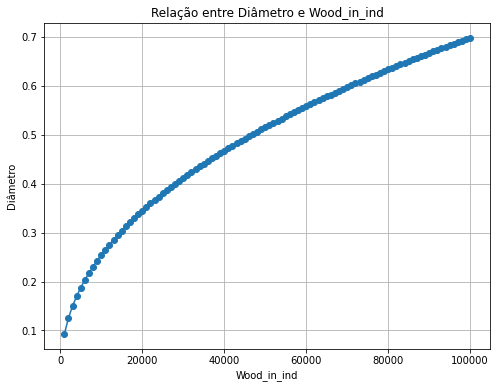

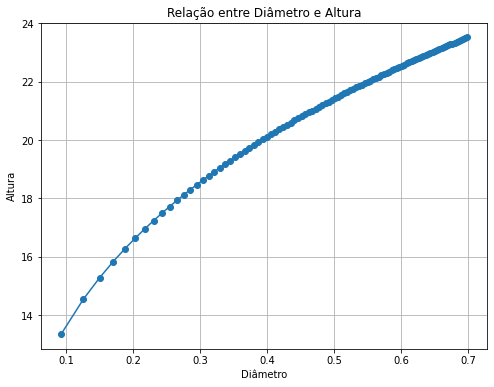

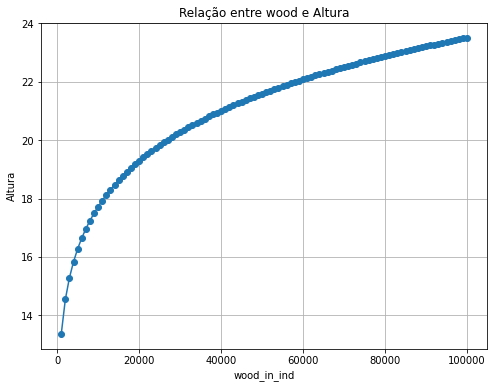

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74 * 1e6
k_allom2 = 26.
k_allom3 = 0.28
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(1*1000, 100*1000, 100)

# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind/100)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind')
plt.ylabel('Diâmetro')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

Using mean value for wood density, gC e valores originais para constantes allométricas


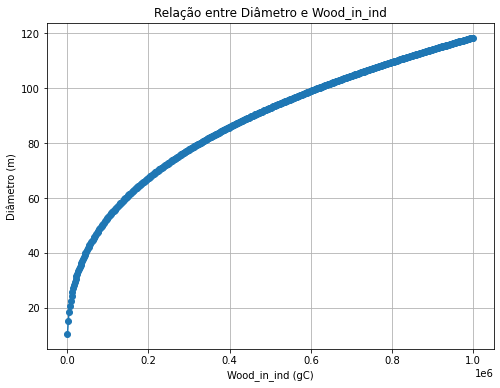

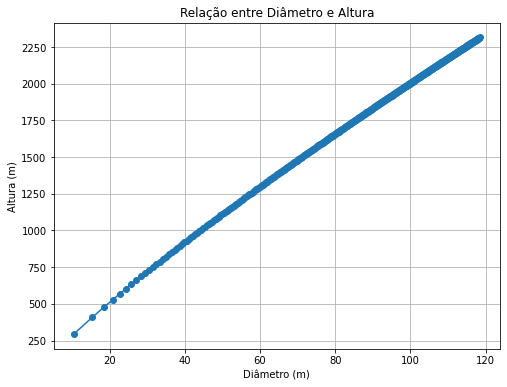

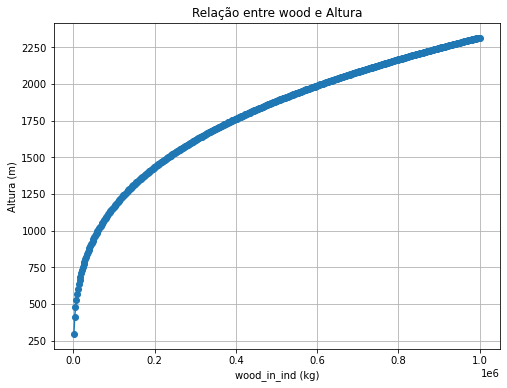

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74*1e6 #0.619 *1000 #gcm-3 - *1000 transforms to m3
k_allom2 = 40.
k_allom3 = 0.85
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(1000, 1000000, 500) #g



# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
  
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind (gC)')
plt.ylabel('Diâmetro (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind (kg)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

Using mean value for wood density, kgC e valores originais para constantes allométricas

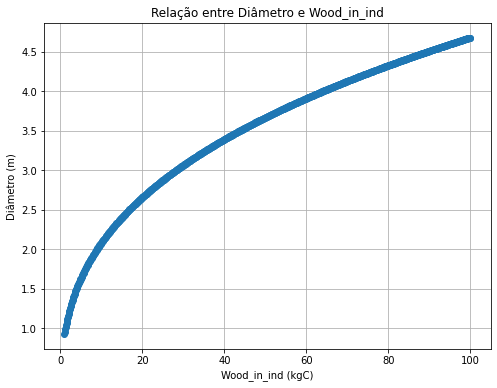

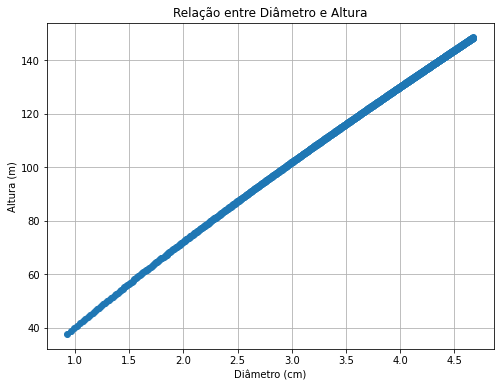

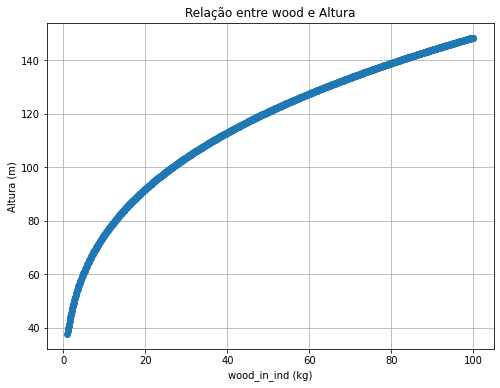

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.619 *1000 #gcm-3 - *1000 transforms to m3
k_allom2 = 40.
k_allom3 = 0.85
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(1, 100, 1000) #kg
wood_in_ind_value = wood_in_ind_values #g


# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
# wood_in_ind_values = wood_in_ind_values/1000   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind (kgC)')
plt.ylabel('Diâmetro (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind (kg)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

Using mean value for wood density, kgC e  constantes allométricas baseadas em Seiler et al 2014

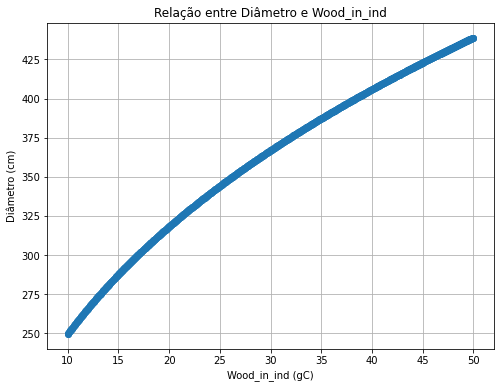

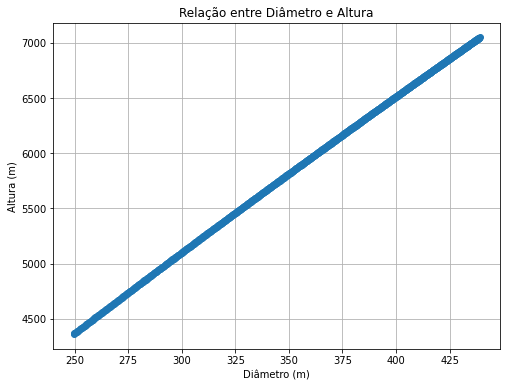

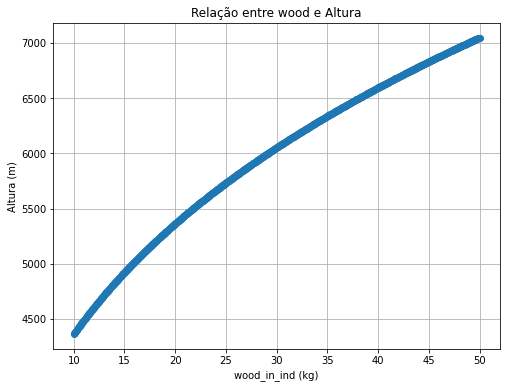

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74 #gm3 
k_allom2 = 40.
k_allom3 = 0.85
klatosa = 8000.
sla_allom = 0.023
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(10, 50, 1000) #kg
#wood_in_ind_value = wood_in_ind_values #g


# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    sap_in_ind = wood_in_ind*0.2
    diameter = ((4*(wood_in_ind*1000)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    
    height = k_allom2 * ((diameter) ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
    leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
    
# wood_in_ind_values = wood_in_ind_values/1000   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind (gC)')
plt.ylabel('Diâmetro (cm)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind (kg)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

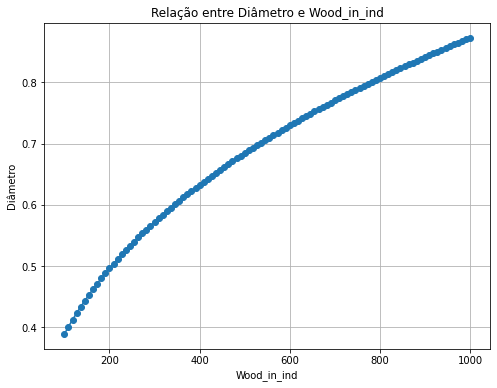

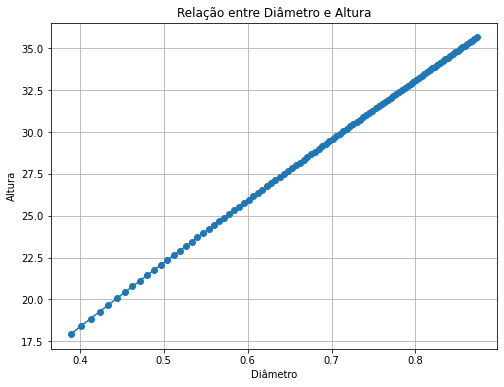

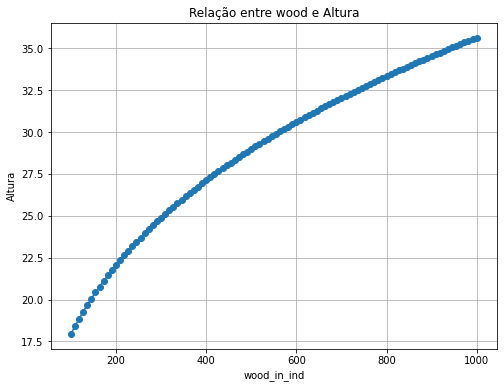

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74 * 1e6
k_allom2 = 40.
k_allom3 = 0.85
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(100, 1000, 100)

# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
   
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind')
plt.ylabel('Diâmetro')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind')
plt.ylabel('Altura')
plt.grid(True)
plt.show()

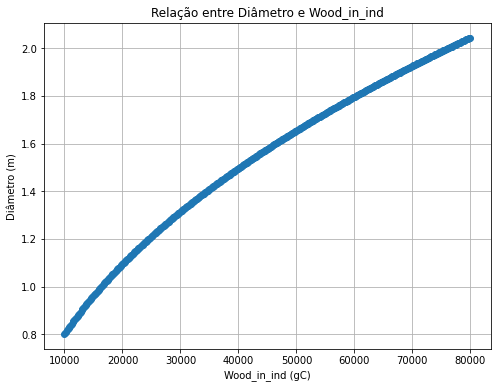

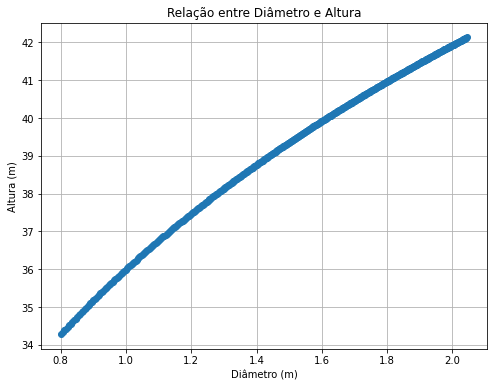

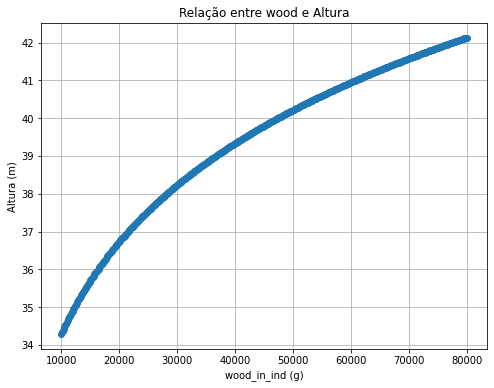

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.74*1e6 #600.#0.5*1e6 #0.74*1000 #0.619 *1000 #gcm-3 - *1000 transforms to m3
k_allom2 = 36.
k_allom3 = 0.22
pi = math.pi

# Faixa de valores para wood_in_ind
wood_in_ind_values = np.linspace(10000., 80000., 500) #g



# Lista para armazenar os valores de diameter
diameter_values = []
height_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for wood_in_ind in wood_in_ind_values:
    diameter = ((4*(wood_in_ind/10.)) / (dwood) * pi * k_allom2) ** (1 / (2 + k_allom3))
    height = k_allom2 * (diameter ** k_allom3)
    diameter_values.append(diameter)
    height_values.append(height)
  
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values,diameter_values,  marker='o')
plt.title('Relação entre Diâmetro e Wood_in_ind')
plt.xlabel('Wood_in_ind (gC)')
plt.ylabel('Diâmetro (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(diameter_values, height_values, marker='o')
plt.title('Relação entre Diâmetro e Altura')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(wood_in_ind_values, height_values, marker='o')
plt.title('Relação entre wood e Altura')
plt.xlabel('wood_in_ind (g)')
plt.ylabel('Altura (m)')
plt.grid(True)
plt.show()

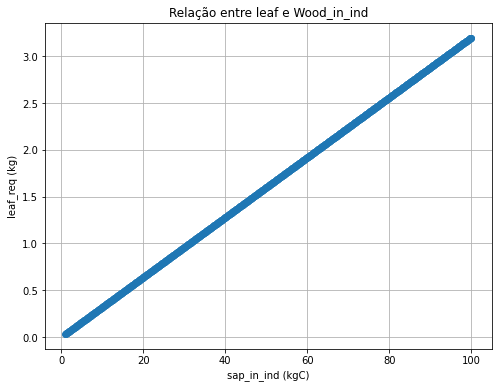

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 500 #kg/m3
k_allom2 = 36.
k_allom3 = 0.22
klatosa = 8000.
height = 25.
sla_allom = 20.
pi = math.pi

# Faixa de valores para wood_in_ind
sap_in_ind_values = np.linspace(1., 100., 1000) #kg



# Lista para armazenar os valores de diameter
leaf_req_values = []


# Calcula os diâmetros para cada valor de wood_in_ind
for sap_in_ind in sap_in_ind_values:
    leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
    leaf_req_values.append(leaf_req)
    
  
# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(sap_in_ind_values,leaf_req_values,  marker='o')
plt.title('Relação entre leaf e Wood_in_ind')
plt.xlabel('sap_in_ind (kgC)')
plt.ylabel('leaf_req (kg)')
plt.grid(True)
plt.show()




1.2324071885401495
23.639232600443897
0.8057630029521928


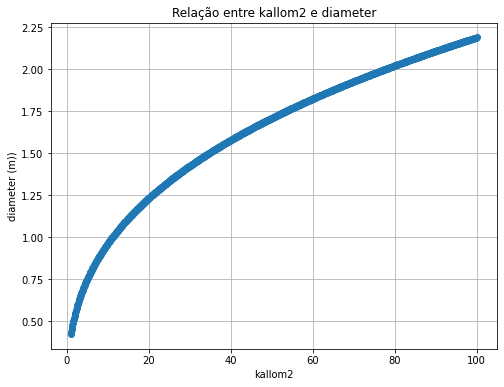

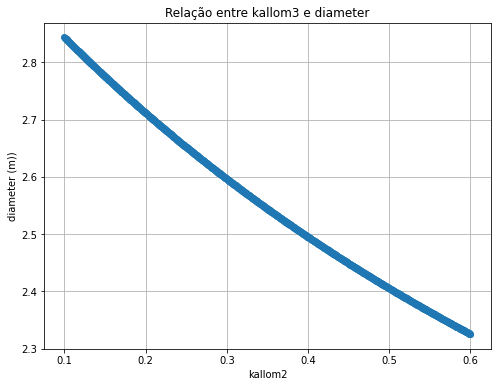

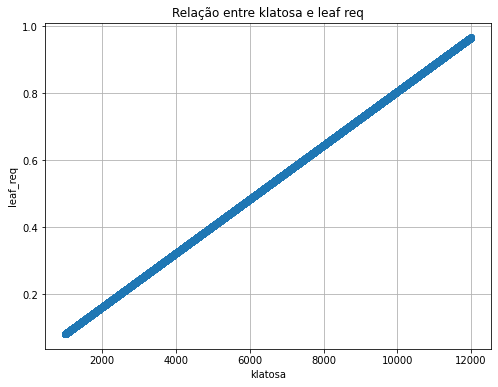

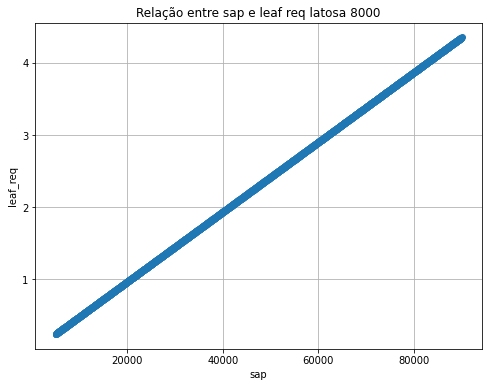

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros da equação
dwood = 0.7*1e6
k_allom2 = 20.
k_allom3 = 0.8
klatosa = 10000.
# height = 25.
sla_allom = 15.
pi = math.pi
sap_in_ind = 20000

diameter = ((sap_in_ind)/(dwood)*pi*k_allom2)**(1/(2+k_allom3))
print(diameter)
height = k_allom2*(diameter**k_allom3)
print(height)
leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
print(leaf_req)

# Faixa de valores para wood_in_ind
k_allom2_values = np.linspace(1., 100., 1000) #kg

k_allom3_values = np.linspace(0.1, .6, 1000) #kg

klatosa_values = np.linspace(1000,12000, 20000)

sap_in_ind_values = np.linspace(5000, 90000, 2000)
# Lista para armazenar os valores de diameter
diameter_values = []


# Calcula os diâmetros para cada valor de wood_in_ind
for k_allom2 in k_allom2_values:
    diameter = ((sap_in_ind)/(dwood)*pi*k_allom2)**(1/(2+k_allom3))
    diameter_values.append(diameter)

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(k_allom2_values,diameter_values,  marker='o')
plt.title('Relação entre kallom2 e diameter')
plt.xlabel('kallom2')
plt.ylabel('diameter (m))')
plt.grid(True)
plt.show()

diameter_values = []

# Calcula os diâmetros para cada valor de wood_in_ind
for k_allom3 in k_allom3_values:
    diameter = ((sap_in_ind)/(dwood)*pi*k_allom2)**(1/(2+k_allom3))
    diameter_values.append(diameter)

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(k_allom3_values,diameter_values,  marker='o')
plt.title('Relação entre kallom3 e diameter')
plt.xlabel('kallom2')
plt.ylabel('diameter (m))')
plt.grid(True)
plt.show()

leaf_req_values = []

for klatosa in klatosa_values:
    leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
    leaf_req_values.append(leaf_req)

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(klatosa_values, leaf_req_values, marker='o')
plt.title('Relação entre klatosa e leaf req')
plt.xlabel('klatosa')
plt.ylabel('leaf_req')
plt.grid(True)
plt.show()

leaf_req_values = []

for sap_in_ind in sap_in_ind_values:
    leaf_req = klatosa * sap_in_ind / (dwood * height * sla_allom)
    leaf_req_values.append(leaf_req)


# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(sap_in_ind_values, leaf_req_values, marker='o')
plt.title('Relação entre sap e leaf req latosa 8000')
plt.xlabel('sap')
plt.ylabel('leaf_req')
plt.grid(True)
plt.show()

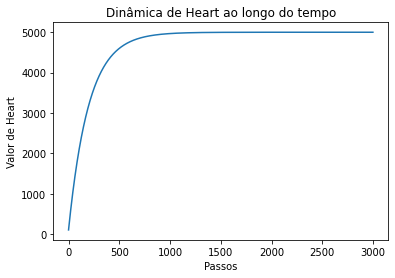

In [8]:
# Taxa de aumento com base em sap
taxa_aumento = 1/4

# Taxa de decaimento
taxa_decaimento = 1/200

# Número de passos
num_passos = 3000

# Valor inicial de heart
heart = 80

# Listas para armazenar os valores de heart ao longo do tempo
heart_valores = []

# Simulação ao longo dos passos
for _ in range(num_passos):
    # Suponha que sap seja uma variável que pode variar a cada passo
    sap = 100  # Aqui você pode ajustar o valor de sap a cada passo conforme necessário
    heart += sap * taxa_aumento - heart * taxa_decaimento
    heart_valores.append(heart)

# Agora você pode visualizar os valores de heart ao longo do tempo
import matplotlib.pyplot as plt

plt.plot(range(num_passos), heart_valores)
plt.xlabel('Passos')
plt.ylabel('Valor de Heart')
plt.title('Dinâmica de Heart ao longo do tempo')
plt.show()


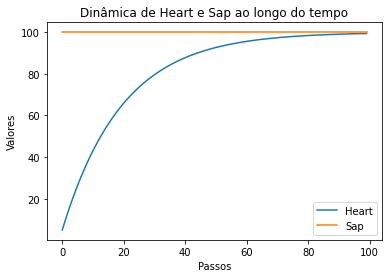

In [9]:
# Taxa de aumento com base em sap
taxa_aumento_sap = 0.05

# Taxa de decaimento
taxa_decaimento_heart = 1/20

# Número de passos
num_passos = 100

# Valor inicial de heart
heart = 0

# Listas para armazenar os valores de heart e sap ao longo do tempo
heart_valores = []
sap_valores = []

# Simulação ao longo dos passos
for _ in range(num_passos):
    # Suponha que sap seja uma variável que pode variar a cada passo
    sap = 100  # Aqui você pode ajustar o valor de sap a cada passo conforme necessário
    heart += sap * taxa_aumento_sap - heart * taxa_decaimento_heart
    heart_valores.append(heart)
    sap_valores.append(sap)

# Agora você pode visualizar os valores de heart e sap ao longo do tempo
import matplotlib.pyplot as plt

plt.plot(range(num_passos), heart_valores, label='Heart')
plt.plot(range(num_passos), sap_valores, label='Sap')
plt.xlabel('Passos')
plt.ylabel('Valores')
plt.title('Dinâmica de Heart e Sap ao longo do tempo')
plt.legend()
plt.show()


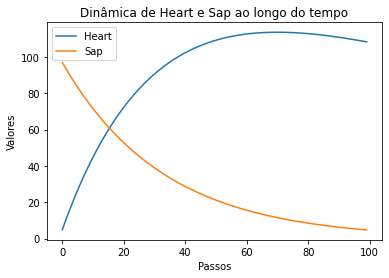

In [10]:
# Taxa de aumento de sap
taxa_aumento_sap = 0.02

# Taxa de decaimento de sap
taxa_decaimento_sap = 1/20

# Taxa de decaimento de heart
taxa_decaimento_heart = 1/200

# Número de passos
num_passos = 100

# Valor inicial de heart e sap
heart = 0
sap = 100

# Listas para armazenar os valores de heart e sap ao longo do tempo
heart_valores = []
sap_valores = []

# Simulação ao longo dos passos
for _ in range(num_passos):
    # Atualização de sap
    sap += sap * taxa_aumento_sap - sap * taxa_decaimento_sap
    
    # Atualização de heart com base em sap
    heart += sap * (1/20) - heart * taxa_decaimento_heart
    
    sap_valores.append(sap)
    heart_valores.append(heart)

# Agora você pode visualizar os valores de heart e sap ao longo do tempo
import matplotlib.pyplot as plt

plt.plot(range(num_passos), heart_valores, label='Heart')
plt.plot(range(num_passos), sap_valores, label='Sap')
plt.xlabel('Passos')
plt.ylabel('Valores')
plt.title('Dinâmica de Heart e Sap ao longo do tempo')
plt.legend()
plt.show()


# Taxa de aumento de sap
taxa_aumento_sap = 0.02

# Taxa de decaimento de sap
taxa_decaimento_sap = 1/20

# Taxa de decaimento de heart
taxa_decaimento_heart = 1/200

# Número de passos
num_passos = 100

# Valor inicial de heart e sap
heart = 0
sap = 100

# Listas para armazenar os valores de heart e sap ao longo do tempo
heart_valores = []
sap_valores = []

# Simulação ao longo dos passos
for _ in range(num_passos):
    # Atualização de sap
    sap += sap * taxa_aumento_sap - sap * taxa_decaimento_sap
    
    # Atualização de heart com base em sap
    heart += sap * (1/20) - heart * taxa_decaimento_heart
    
    sap_valores.append(sap)
    heart_valores.append(heart)

# Agora você pode visualizar os valores de heart e sap ao longo do tempo
import matplotlib.pyplot as plt

plt.plot(range(num_passos), heart_valores, label='Heart')
plt.plot(range(num_passos), sap_valores, label='Sap')
plt.xlabel('Passos')
plt.ylabel('Valores')
plt.title('Dinâmica de Heart e Sap ao longo do tempo')
plt.legend()
plt.show()


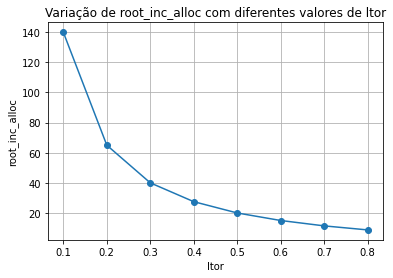

In [1]:
import matplotlib.pyplot as plt

# Suponha que você tenha valores para leaf_in_ind, leaf_inc_alloc e root_in_ind
leaf_in_ind = 10.0
leaf_inc_alloc = 5.0
root_in_ind = 10.0

# Defina diferentes valores de ltor
ltor_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Inicialize uma lista para armazenar os valores de root_inc_alloc
root_inc_alloc_values = []

# Calcule root_inc_alloc para diferentes valores de ltor e armazene-os na lista
for ltor in ltor_values:
    root_inc_alloc = ((leaf_in_ind + leaf_inc_alloc) / ltor) - root_in_ind
    root_inc_alloc_values.append(root_inc_alloc)

# Crie o gráfico
plt.plot(ltor_values, root_inc_alloc_values, marker='o', linestyle='-')
plt.title('Variação de root_inc_alloc com diferentes valores de ltor')
plt.xlabel('ltor')
plt.ylabel('root_inc_alloc')
plt.grid(True)

# Exiba o gráfico
plt.show()


Testando distribuição de abundância relativa dos PLSs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load csv

In [5]:
table = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/outputs/tresmil/gridcell175-235/csv/PLS_alive_traits.csv")
table

,YEAR,PID,OC,sla_random,sla_ocp
0,1979,1509,0.067373,0.022506,0.001516
1,1980,1509,0.072333,0.022506,0.001628
2,1981,1509,0.044784,0.022506,0.001008
3,1982,1509,0.043596,0.022506,0.000981
4,1983,1509,0.058925,0.022506,0.001326
...,...,...,...,...,...
1211,2012,856,0.000000,0.041651,0.000000
1212,2013,856,0.000000,0.041651,0.000000
1213,2014,856,0.000000,0.041651,0.000000
1214,2015,856,0.000000,0.041651,0.000000


In [15]:
time = table['YEAR']
time

#select the PLSs IDs
PLS_id = table['PID'].unique()
PLS_id

#Creates a dataframe to each PLS
PLS_abundance = {}

for PLS in PLS_id:
    PLS_ocp = table.loc[table['PID'] == PLS, 'OC' ].tolist()

    PLS_abundance[PLS] = PLS_ocp 

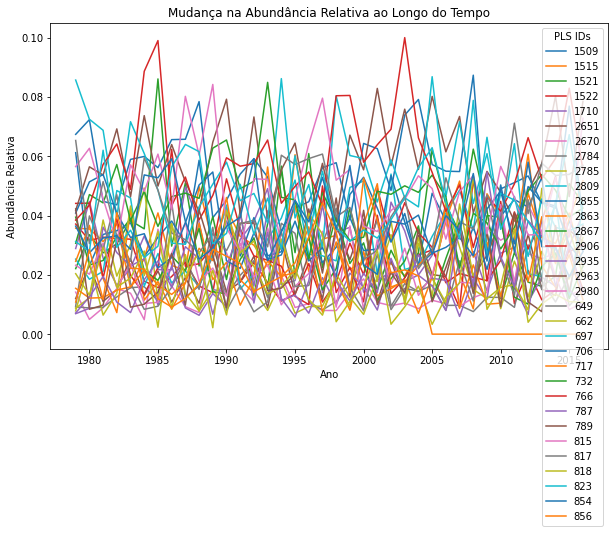

In [24]:
# Obter anos e IDs únicos
time = table['YEAR'].unique()
PLS_ids = table['PID'].unique()

# Criar um gráfico de linha para cada PLS
plt.figure(figsize=(10, 6))

for PLS in PLS_ids:
    PLS_ocp = table.loc[table['PID'] == PLS, 'OC']
    plt.plot(time, PLS_ocp, label=PLS)

plt.title('Mudança na Abundância Relativa ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Abundância Relativa')
plt.legend(title='PLS IDs')
plt.show()

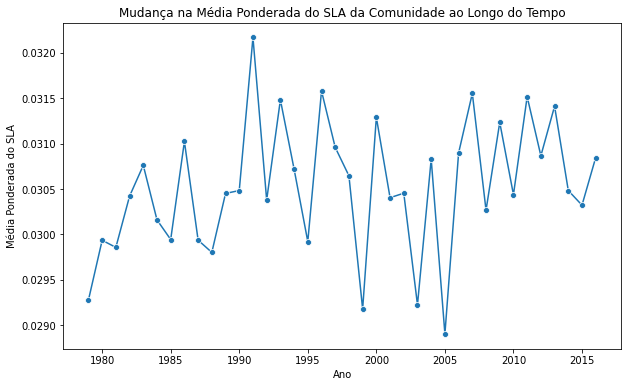

In [28]:
# média ponderada do SLA para cada ano
weighted_mean_sla_per_year = (table.groupby(['YEAR'])['sla_random']
                               .apply(lambda x: (x * table.loc[x.index, 'OC']).sum() / table.loc[x.index, 'OC'].sum())
                               .reset_index())

# Criar um gráfico de linha para a média ponderada do SLA ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=weighted_mean_sla_per_year, x='YEAR', y='sla_random', marker='o')

plt.title('Mudança na Média Ponderada do SLA da Comunidade ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Média Ponderada do SLA')
plt.show()

<AxesSubplot:xlabel='sla_random', ylabel='Density'>

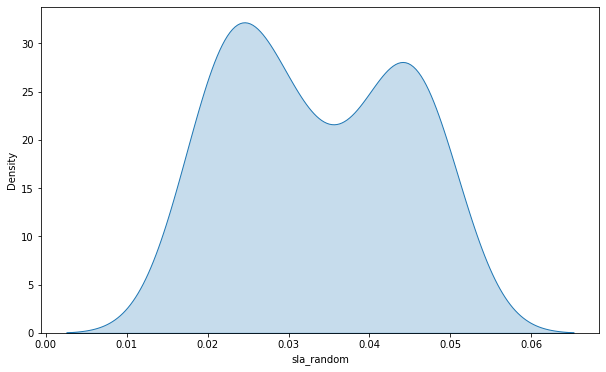

In [29]:
# Selecionar dados para o ano de 1979
data_1979 = table[table['YEAR'] == 1979]['sla_random']

# Criar o gráfico de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_1979, fill=True)

<AxesSubplot:xlabel='sla_random', ylabel='Density'>

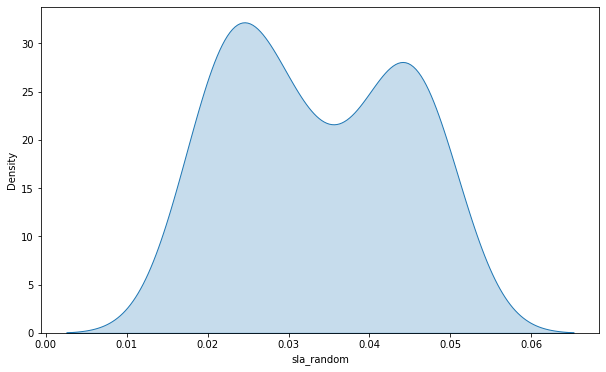

In [30]:
# Selecionar dados para o ano de 1979
data_1979 = table[table['YEAR'] == 2015]['sla_random']

# Criar o gráfico de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_1979, fill=True)

In [10]:
import numpy as np

def find_coord(N, W):
    """ Given a pair of geographic (WGS84) coordinates (decimal degrees)
        returns the Y and X indices in the array (360,720//0.5° lon-lat)
        (C_contiguous) Tested only in south america"""
    Yc = round(N, 2)
    Xc = round(W, 2)

    if abs(Yc) > 89.75:
        if Yc < 0:
            Yc = -89.75
        else:
            Yc = 89.75

    if abs(Xc) > 179.75:
        if Xc < 0:
            Xc = -179.75
        else:
            Xc = 179.75

    Yind = 0
    Xind = 0

    lon = np.arange(-179.75, 180, 0.5)
    lat = np.arange(89.75, -90, -0.5)

    if True:
        while Yc < lat[Yind]:
            Yind += 1
    # else:
    #     Yind += lat.size // 2
    #     while Yc > lat[Yind]:
    #         Yind += 1
    if Xc <= 0:
        while Xc > lon[Xind]:
            Xind += 1
    else:
        Xind += lon.size // 2
        while Xc > lon[Xind]:
            Xind += 1
    
    
    return Yind, Xind

"ALP - Allpahuayo"
coord = find_coord(-3.9333, -73.4167)
print('ALP',coord)

"FEC - Fazenda Experimental de Catuaba"
coord = find_coord(-10.0667, -67.6167)
print('FEC',coord)

"MAN - Manaus"
coord = find_coord(-3.0167, -60.35)
print('MAN',coord)

"CAX - Caxiuanã"
coord = find_coord(-1.7167, -51.45)
print('CAX',coord)

"NVX - Nova Xavantina"
coord = find_coord(-14.8167, -55.4)
print('FEC',coord)

import numpy as np

def reverse_coord(Yind, Xind):
    """ Given Y and X indices in the array (360,720//0.5° lon-lat)
        returns the corresponding geographic (WGS84) coordinates (decimal degrees)"""
    lon = np.arange(-179.75, 180, 0.5)
    lat = np.arange(89.75, -90, -0.5)

    Yc = lat[Yind]
    Xc = lon[Xind]

    return Yc, Xc

# Exemplos de uso
Yind, Xind = 200, 225
coordinates = reverse_coord(Yind, Xind)
print(f'Coordinates for Yind={Yind}, Xind={Xind}: {coordinates}')


ALP (188, 213)
FEC (200, 225)
MAN (186, 239)
CAX (183, 257)
FEC (210, 249)
Coordinates for Yind=200, Xind=225: (-10.25, -67.25)


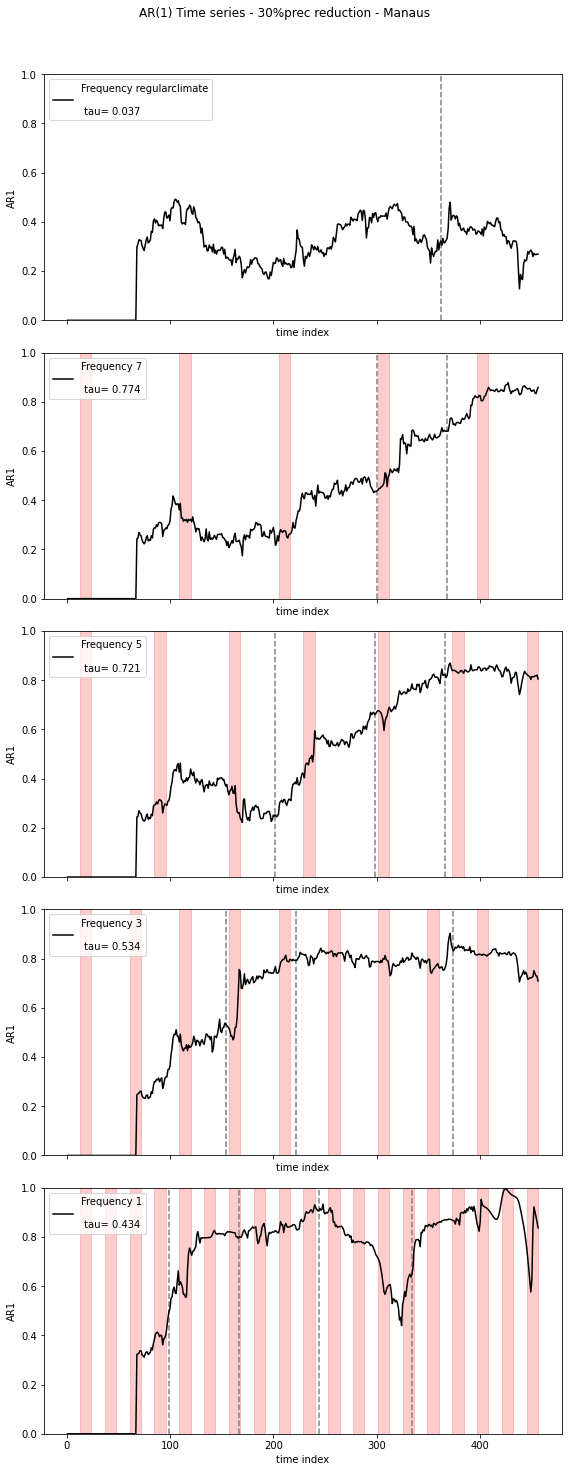

0         1
1         2
2         3
3         4
4         5
       ... 
2275    452
2276    453
2277    454
2278    455
2279    456
Name: timeindex, Length: 2280, dtype: int64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/results_csv/MAN_30prec_allfreq_timeseries_ews.csv")

# Filtrar para os anos de 1980, 1981 e 1982
df_1980 = df[df['Dates'].str.startswith('1980')]
df_1981 = df[df['Dates'].str.startswith('1981')]
df_1983 = df[df['Dates'].str.startswith('1982')]

freq = df['frequency']
tau = ['1', '2', '3', '4', '5']

fig, axs = plt.subplots(5, 1, figsize=(8, 4 * 5), sharex=True)

for i, f in enumerate(freq.unique()):
    subset_df = df[df['frequency'] == f]
    
        
    axs[i].set_ylabel('AR1')  # Adicionar rótulo ao eixo y
    axs[i].set_xlabel('time index')  # Adicionar rótulo ao eixo y
    # Adicionar linha tracejada vertical quando a frequência é "regularclimate" e o timeindex é 362
    if f == 'regularclimate':
        tau = 0.037
        axs[i].axvline(x=362, linestyle='--', color='grey')
        axs[i].plot(subset_df['timeindex'], subset_df['ar1'], label=f'Frequency {f}\n\n tau= {tau}', color='black')
        
    elif f == '1':
        tau = 0.434
        axs[i].axvline(x=99, linestyle='--', color='grey')
        axs[i].axvline(x=167, linestyle='--', color='grey')
        axs[i].axvline(x=244, linestyle='--', color='grey')
        axs[i].axvline(x=334, linestyle='--', color='grey')
        axs[i].plot(label=f'{tau}')
        axs[i].plot(subset_df['timeindex'], subset_df['ar1'], label=f'Frequency {f}\n\n tau= {tau}', color='black')
        # Adicionar faixas vermelhas para os ranges de 1980, 1982, 1984, ..., 2016
        for year in range(1980, 2017, 2):
            df_year = df[df['Dates'].str.startswith(str(year))]
            axs[i].axvspan(df_year['timeindex'].min(), df_year['timeindex'].max(), color='red', alpha=0.2)
            
    elif f == '3':
        tau = 0.534
        axs[i].axvline(x=154, linestyle='--', color='grey')
        axs[i].axvline(x=222, linestyle='--', color='grey')
        axs[i].axvline(x=374, linestyle='--', color='grey')
        axs[i].plot(subset_df['timeindex'], subset_df['ar1'], label=f'Frequency {f}\n\n tau= {tau}', color='black')
        # Adicionar faixas vermelhas para os ranges de 1980, 1981 e 1982
        for year in range(1980, 2017, 4):
            df_year = df[df['Dates'].str.startswith(str(year))]
            axs[i].axvspan(df_year['timeindex'].min(), df_year['timeindex'].max(), color='red', alpha=0.2)
            
    elif f == '5':
        tau = 0.721
        axs[i].axvline(x=202, linestyle='--', color='grey')
        axs[i].axvline(x=298, linestyle='--', color='grey')
        axs[i].axvline(x=366, linestyle='--', color='grey')
        axs[i].plot(subset_df['timeindex'], subset_df['ar1'], label=f'Frequency {f}\n\n tau= {tau}', color='black')
        for year in range(1980, 2017, 6):
            df_year = df[df['Dates'].str.startswith(str(year))]
            axs[i].axvspan(df_year['timeindex'].min(), df_year['timeindex'].max(), color='red', alpha=0.2)
    elif f == '7':
        tau = 0.774
        axs[i].axvline(x=300, linestyle='--', color='grey')
        axs[i].axvline(x=368, linestyle='--', color='grey')
        axs[i].plot(subset_df['timeindex'], subset_df['ar1'], label=f'Frequency {f}\n\n tau= {tau}', color='black')
        for year in range(1980, 2017, 8):
            df_year = df[df['Dates'].str.startswith(str(year))]
            axs[i].axvspan(df_year['timeindex'].min(), df_year['timeindex'].max(), color='red', alpha=0.2)
    axs[i].legend()
    

# Ajustar os eixos y para variar de 0 a 1
for ax in axs:
    ax.set_ylim(0, 1)


plt.suptitle('AR(1) Time series - 30%prec reduction - Manaus', y=1.02)
plt.tight_layout()
plt.show()

print(df['timeindex'])


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


df = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/results_csv/MAN_30prec_allfreq_timeseries_ews.csv")

freq = df['frequency']
print(df.columns)
# print(df['Dates'])
df['datetime'] = pd.to_datetime(df['Dates'].astype(str) + '-01', format='%Y-%m-%d', errors='coerce').dt.to_period('M')

print(df['Dates'].head())
print(df['datetime'])

Index(['timeindex', 'ar1', 'sd', 'sk', 'kurt', 'cv', 'returnrate', 'densratio',
       'acf1', 'frequency', 'Unnamed: 10'],
      dtype='object')


KeyError: 'Dates'

In [36]:
import pandas as pd

# Criar uma coluna de datas mensais de 1979-01 até 2016-12
date_range = pd.date_range(start='1979-01-01', end='2016-12-31', freq='M')

# Criar um DataFrame com a coluna de ano e mês
df = pd.DataFrame({'Year_Month': date_range.strftime('%Y-%m')})
df.to_csv("data.csv")
# Exibir o DataFrame
print(df)


    Year_Month
0      1979-01
1      1979-02
2      1979-03
3      1979-04
4      1979-05
..         ...
451    2016-08
452    2016-09
453    2016-10
454    2016-11
455    2016-12

[456 rows x 1 columns]


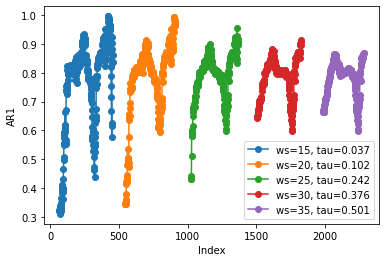

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/home/bianca/bianca/CAETE-DVM-alloc-allom/scripts/EWS/window_size_sensitivity/window_size_sens_1y.csv")

# Ensure 'ws' column values are integers
df['ws'] = df['ws'].astype(int)

tau_values = {'15': 0.037, '20': 0.102, '25': 0.242, '30': 0.376, '35': 0.501}


# Map values and handle NaN by using a default value (e.g., np.nan)
df['tau'] = df['ws'].map(lambda x: tau_values.get(str(x), np.nan))

# Plotting
fig, ax = plt.subplots()

# Iterate through unique 'ws' values
for ws_value in df['ws'].unique():
    # Filter rows for the current 'ws' value
    ws_df = df[df['ws'] == ws_value]
    
    # Plot a line for each 'ws' value with corresponding color
    line, = ax.plot(ws_df.index, ws_df['ar1'], label=f"ws={ws_value}, tau={tau_values.get(str(ws_value), 'NaN')}", marker='o')

# Add legend
ax.legend()

# Set labels
ax.set_xlabel('Index')
ax.set_ylabel('AR1')

# Show the plot
plt.show()

